In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import seaborn as sns
from sklearn.linear_model import LogisticRegression
mpl.rcParams['figure.dpi']

100.0

In [2]:
df = pd.read_csv('/content/cc_cleaned.csv')

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,False,False,False,True
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,False,False,False,True
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,False,False,False,True
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,False,False,False,True
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,False,False,False,True


**Exploring the Features**

In [4]:
features_response = df.columns.tolist()

In [5]:
features_response[:5]

['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE']

In [6]:
features_response[-5:]

['EDUCATION_CAT', 'graduate school', 'high school', 'others', 'university']

We will not use 'SEX' column because of ethical concern, and PAY2 to PAY6 feature have flaw in it so we cannot use. And we are not using one-hot encoding column of 'EDUCATION' because the information already correct in the column. Last, we not use ID as a feature.

In [7]:
# List of the features that need to be removed
removed_items = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'EDUCATION_CAT',
                 'graduate school', 'high school', 'others', 'university']

In [8]:
# Removing the unwanted feature
features_response = [item for item in features_response if item not in removed_items]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [9]:
# Look for correlation of each features and response
corr = df[features_response].corr()
corr

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_1,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
LIMIT_BAL,1.000000,-0.232688,-0.111873,0.149157,-0.273396,0.287009,0.279289,0.285299,0.294342,0.295198,0.289818,0.194820,0.188049,0.207638,0.202795,0.218082,0.221305,-0.154423
EDUCATION,-0.232688,1.000000,-0.137097,0.179035,0.112653,0.016156,0.012307,0.007683,-0.005862,-0.013174,-0.012670,-0.040092,-0.033610,-0.042349,-0.039319,-0.044946,-0.046859,0.034966
MARRIAGE,-0.111873,-0.137097,1.000000,-0.412828,0.019759,-0.028610,-0.026009,-0.029192,-0.027740,-0.029895,-0.024414,-0.002951,-0.007548,-0.003408,-0.014387,-0.000410,-0.009461,-0.026030
AGE,0.149157,0.179035,-0.412828,1.000000,-0.044277,0.056245,0.054099,0.054107,0.051241,0.049701,0.047519,0.025437,0.025421,0.029876,0.025307,0.020541,0.021640,0.014334
PAY_1,-0.273396,0.112653,0.019759,-0.044277,1.000000,0.185826,0.188799,0.181257,0.178812,0.180438,0.177486,-0.081450,-0.073295,-0.072682,-0.064112,-0.057021,-0.061031,0.325365
BILL_AMT1,0.287009,0.016156,-0.028610,0.056245,0.185826,1.000000,0.951651,0.900386,0.860149,0.828615,0.802008,0.138221,0.112460,0.145635,0.160204,0.163425,0.178943,-0.020508
BILL_AMT2,0.279289,0.012307,-0.026009,0.054099,0.188799,0.951651,1.000000,0.937488,0.892103,0.858078,0.830300,0.276583,0.114473,0.137514,0.148685,0.153851,0.172472,-0.014579
BILL_AMT3,0.285299,0.007683,-0.029192,0.054107,0.181257,0.900386,0.937488,1.000000,0.930385,0.889186,0.855154,0.242809,0.287837,0.119456,0.141010,0.159446,0.178121,-0.014649
BILL_AMT4,0.294342,-0.005862,-0.027740,0.051241,0.178812,0.860149,0.892103,0.930385,1.000000,0.937799,0.899241,0.229123,0.217716,0.293652,0.131700,0.158633,0.171339,-0.011349
BILL_AMT5,0.295198,-0.013174,-0.029895,0.049701,0.180438,0.828615,0.858078,0.889186,0.937799,1.000000,0.945671,0.212053,0.189566,0.241291,0.296192,0.140669,0.161847,-0.006753


<Axes: >

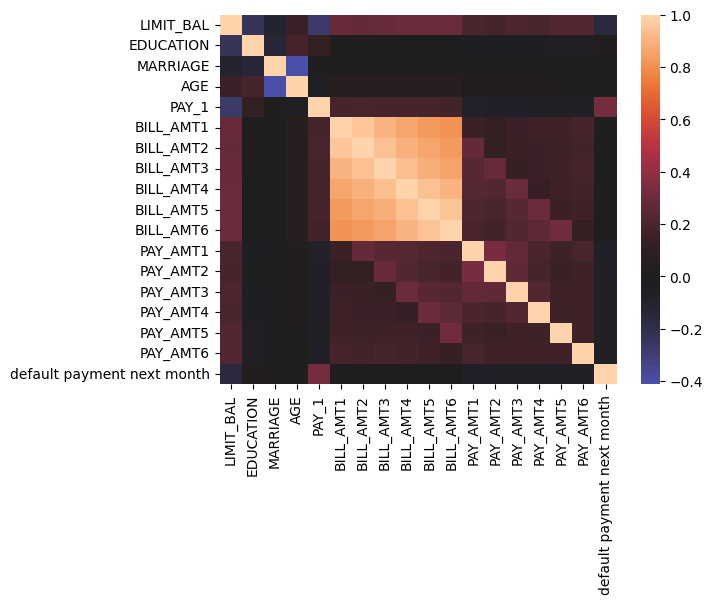

In [10]:
# Creating correlation plot
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            center=0)

PAY_1 is a feature that have strong correlation with the response variable. BILL_AMT has a strong correlation with each other.

If the two feature have high correlation score, it means that those two have high correlation, they have strong association. This will good when used as supplement to make prediction.

**Math behind Linear Correlation**


<h2 align="center">
  $$ \rho = \frac{E[(X - \mu_X)(Y - \mu_Y)]}{\sigma_X\sigma_Y} $$
</h2>

We use this to show how the correlation will work. This Linear (Pearson) Correlation is not suitable for binary classification model.

In [11]:
# Create synthetic data to see it correlation
n_points = 500
np.random.seed(seed=2)
X = np.random.uniform(low=0.0, high=10.0, size=(n_points,))
slope = 0.25
noise = 0.2
y = []
y.append( slope * X + np.random.normal(loc=0.0, scale=noise, size=(n_points,)) )
y.append( -slope * X + np.random.normal(loc=0.0, scale=noise, size=(n_points,)) )
y.append( np.random.normal(loc=0.0, scale=noise, size=(n_points,)) )
y.append( np.sin(X/(2)*np.pi) + np.random.normal(loc=0.0, scale=noise, size=(n_points,)) )

In [12]:
np.corrcoef(X, y[3])

array([[1.        , 0.01900706],
       [0.01900706, 1.        ]])

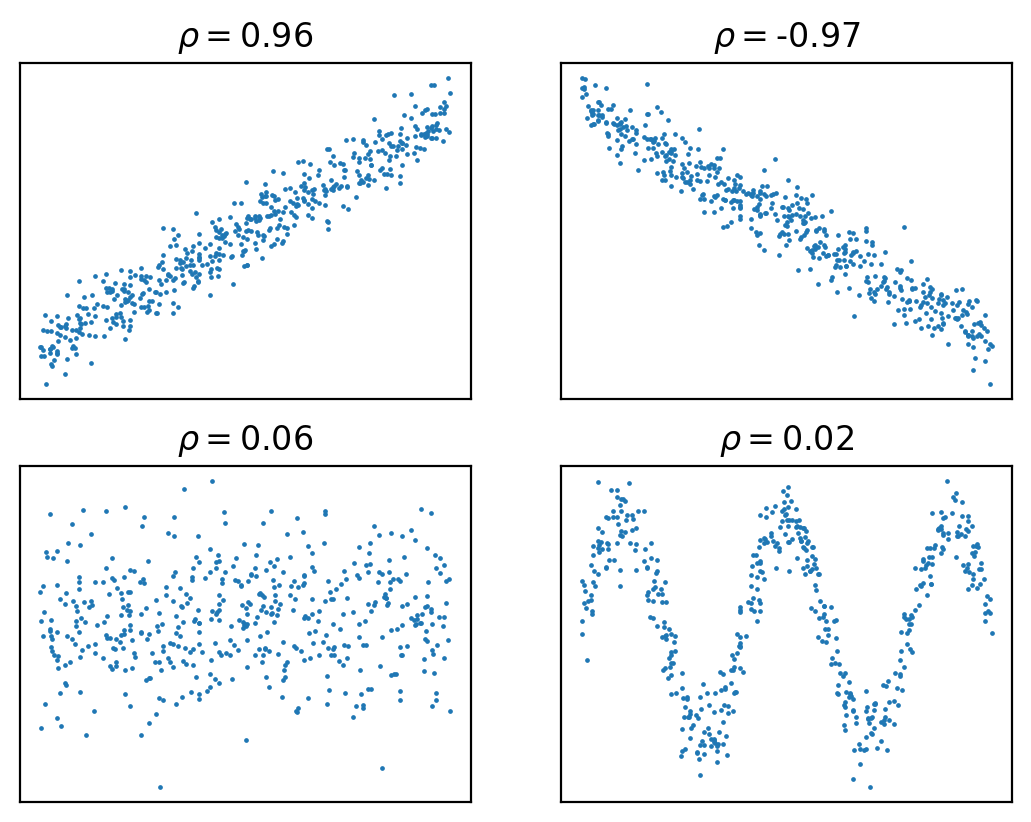

In [13]:
# Plot the correlation
mpl.rcParams['figure.dpi'] = 200
fig_h, ax_h = plt.subplots(2,2)
counter = 0
correlation = []
titles = [1, 2, 3, 4]
for axis in ax_h.flatten():
  axis.scatter(X, y[counter], s=0.5)
  axis.set_xticks([])
  axis.set_yticks([])
  axis.set_title(r'$\rho = ${:0.2f}'.format(np.corrcoef(X, y[counter])[0,1])) #titles[counter]
  correlation.append(np.corrcoef(X, y[counter])[0,1])
  counter+=1

Image above visualize how each correlation value, represented in ρ, have a different relationship.

Because this is binary classification, we will change our method into use **F-Test**

**Seeing Features Correlation using F-Test**

In [14]:
# Separate features and response as Numpy array
# Drop rows with missing values before separating features and response
df_cleaned = df[features_response].dropna()
X = df_cleaned.iloc[:,:-1].values
y = df_cleaned.iloc[:,-1].values
print(X.shape, y.shape)

(26664, 17) (26664,)


In [15]:
# Import F-Test and feed it into features and response
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectPercentile

[f_stat, f_p_value] = f_classif(X,y)

f_classif has two output: **F-statistic** and the **p-value**, for comparison of each features to response variable.

In [16]:
# Creating df of features names, F-stat, and p-val, and show it based on sort of p-val
f_test_df = pd.DataFrame({'Feature':features_response[:-1],
                          'F Statisitic':f_stat,
                          'p-value':f_p_value})
f_test_df.sort_values('p-value')

,Feature,F Statisitic,p-value
4,PAY_1,3156.672300,0.000000e+00
0,LIMIT_BAL,651.324071,5.838366e-142
11,PAY_AMT1,140.612679,2.358354e-32
12,PAY_AMT2,101.408321,8.256124e-24
13,PAY_AMT3,90.023873,2.542641e-21
15,PAY_AMT5,85.843295,2.090120e-20
16,PAY_AMT6,80.420784,3.219565e-19
14,PAY_AMT4,79.640021,4.774112e-19
1,EDUCATION,32.637768,1.122175e-08
2,MARRIAGE,18.078027,2.127555e-05


For every decrease in p-value, there is an increase in F-stat, so the column is identical in the terms of ranking deatures.

Now, we want to select top 20% of features with highest score

In [17]:
# Select top 20% feature
selector = SelectPercentile(f_classif, percentile=20)

In [18]:
selector.fit(X, y)

SelectPercentile(percentile=20)

In [19]:
SelectPercentile(percentile=20)

SelectPercentile(percentile=20)

In [20]:
# Selecting indices of selected features in an array
top_features_i = selector.get_support()
top_features_i

array([ True, False, False, False,  True, False, False, False, False,
       False, False,  True,  True, False, False, False, False])

In [21]:
features = features_response[:-1]

In [22]:
top_features = [features[counter]
                for counter in range(len(features))
                if top_features_i[counter]]
top_features

['LIMIT_BAL', 'PAY_1', 'PAY_AMT1', 'PAY_AMT2']

**Visualize the Relationship between Features and Variables**

In [23]:
# Calculating the baseline of response variable
overall_default_rate = df['default payment next month'].mean()
overall_default_rate

np.float64(0.2217971797179718)

In [24]:
# Default rate for PAY_1
dr_pay = df.groupby('PAY_1')['default payment next month'].mean()
dr_pay

,default payment next month
PAY_1,
-2,0.131664
-1,0.170002
0,0.128295
1,0.336400
2,0.694701
3,0.773973
4,0.682540
5,0.434783
6,0.545455


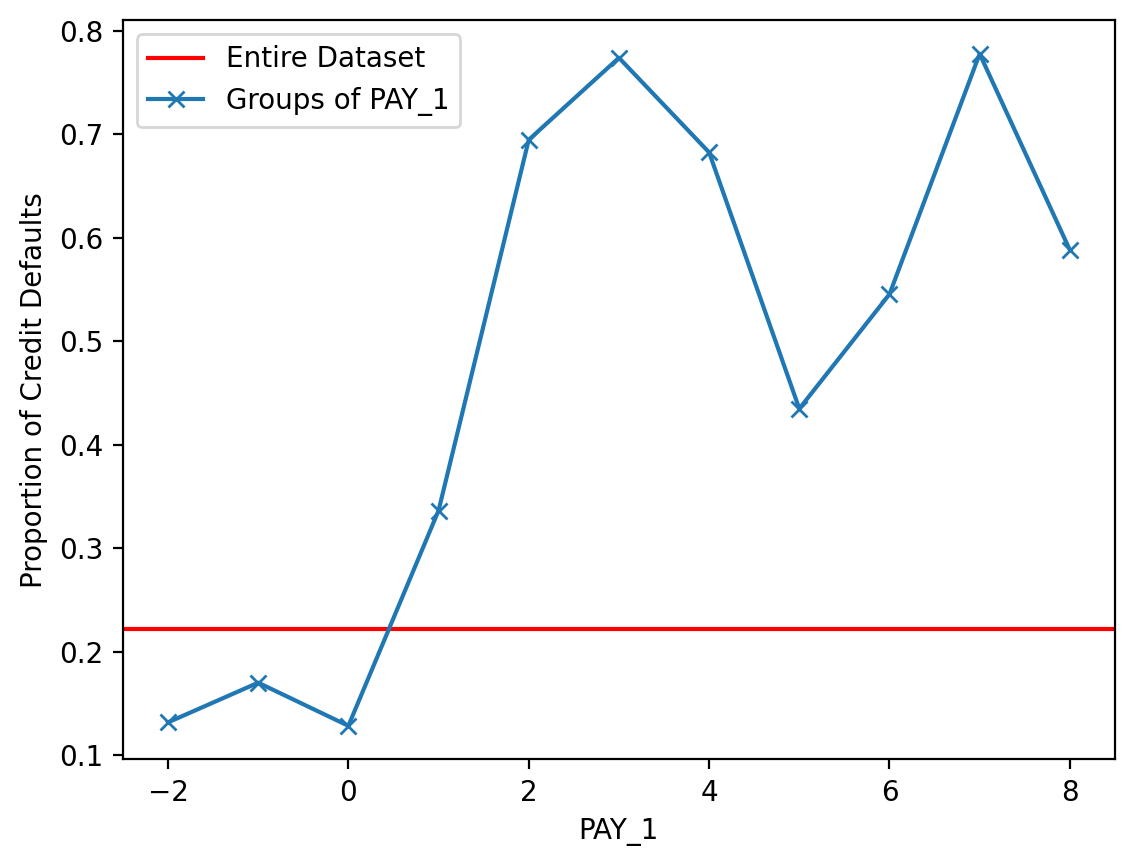

In [25]:
# Viz the Default Rate
axes = plt.axes()
axes.axhline(overall_default_rate, color='red')
dr_pay.plot(marker='x', legend=False, ax=axes)
axes.set_ylabel('Proportion of Credit Defaults')
axes.legend(['Entire Dataset', 'Groups of PAY_1'])

So, those who are defaulted before, are likely to deafult again.The default rate of account with good record is well below the overall default rate. However, over 30% of the accounts that were in default last month will be in default again next month, according to this.

Now, its turn to exploring **LIMIT_BAL**

In [26]:
# Mask of pos & neg
pos = y == 1
neg = y == 0

Text(0.5, 1.0, 'Credit Limit by Response Variable')

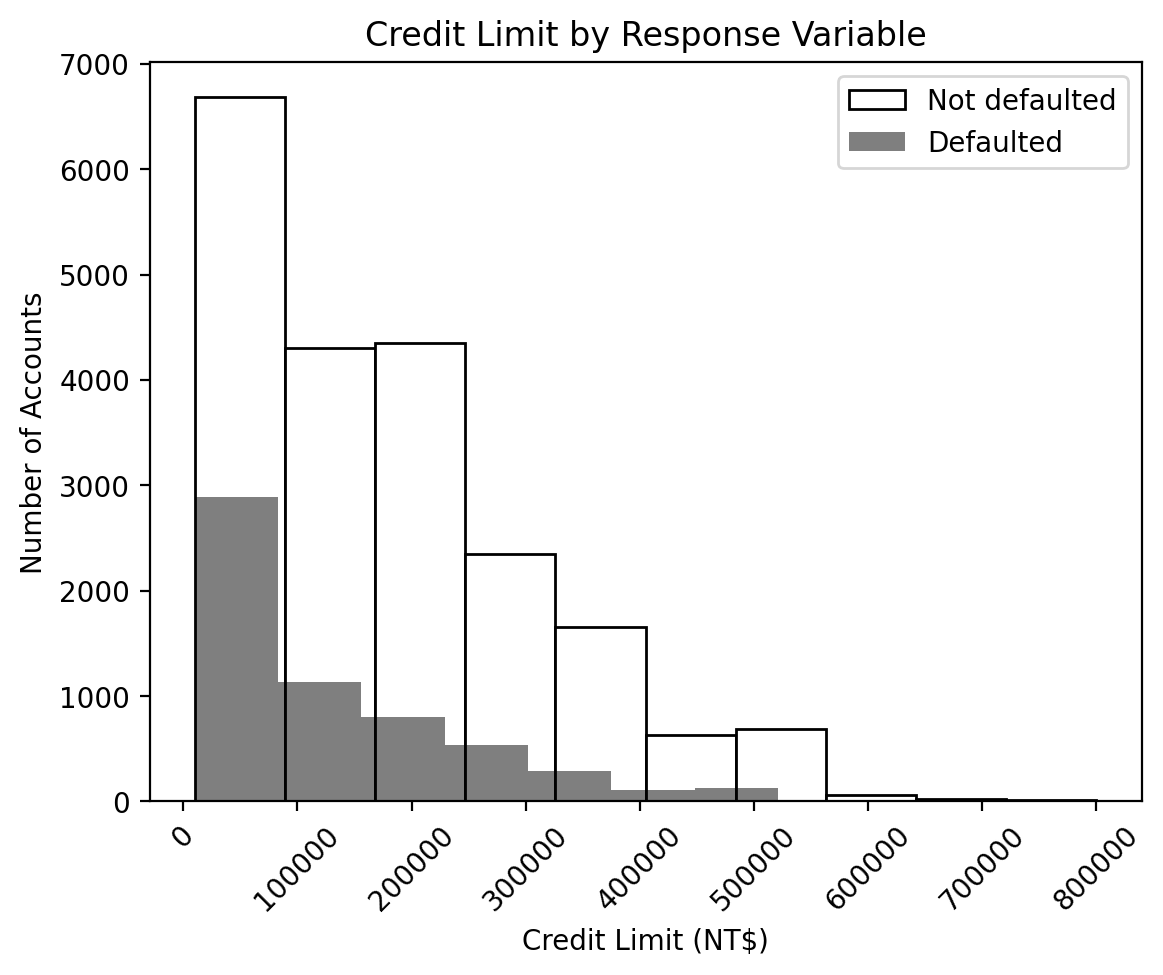

In [27]:
# Create histogram of LIMIT_BAL
axes = plt.axes()
axes.hist(df.loc[neg, 'LIMIT_BAL'], edgecolor='black', color='white')
axes.hist(df.loc[pos, 'LIMIT_BAL'], alpha=0.5, edgecolor=None, color='black')
axes.tick_params(axis='x', labelrotation=45)
axes.set_xlabel('Credit Limit (NT$)')
axes.set_ylabel('Number of Accounts')
axes.legend(['Not defaulted', 'Defaulted'])
axes.set_title('Credit Limit by Response Variable')

The transparent histogram is bigger that the gray one. This conclude that fewer account default than don't default.

But, this histogram has fewer bins, it doesnt represent all value in the LIMIT_BAL column.

In [28]:
# Setting up bin edges
df['LIMIT_BAL'].max()

800000

In [29]:
bin_edges = list(range(0,850000,50000))
print(bin_edges)

[0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, 550000, 600000, 650000, 700000, 750000, 800000]


/tmp/ipython-input-2634521867.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_yticklabels(np.round(y_ticks*50000,2))


Text(0.5, 1.0, 'Normalized Distribution of credit limits by response variable')

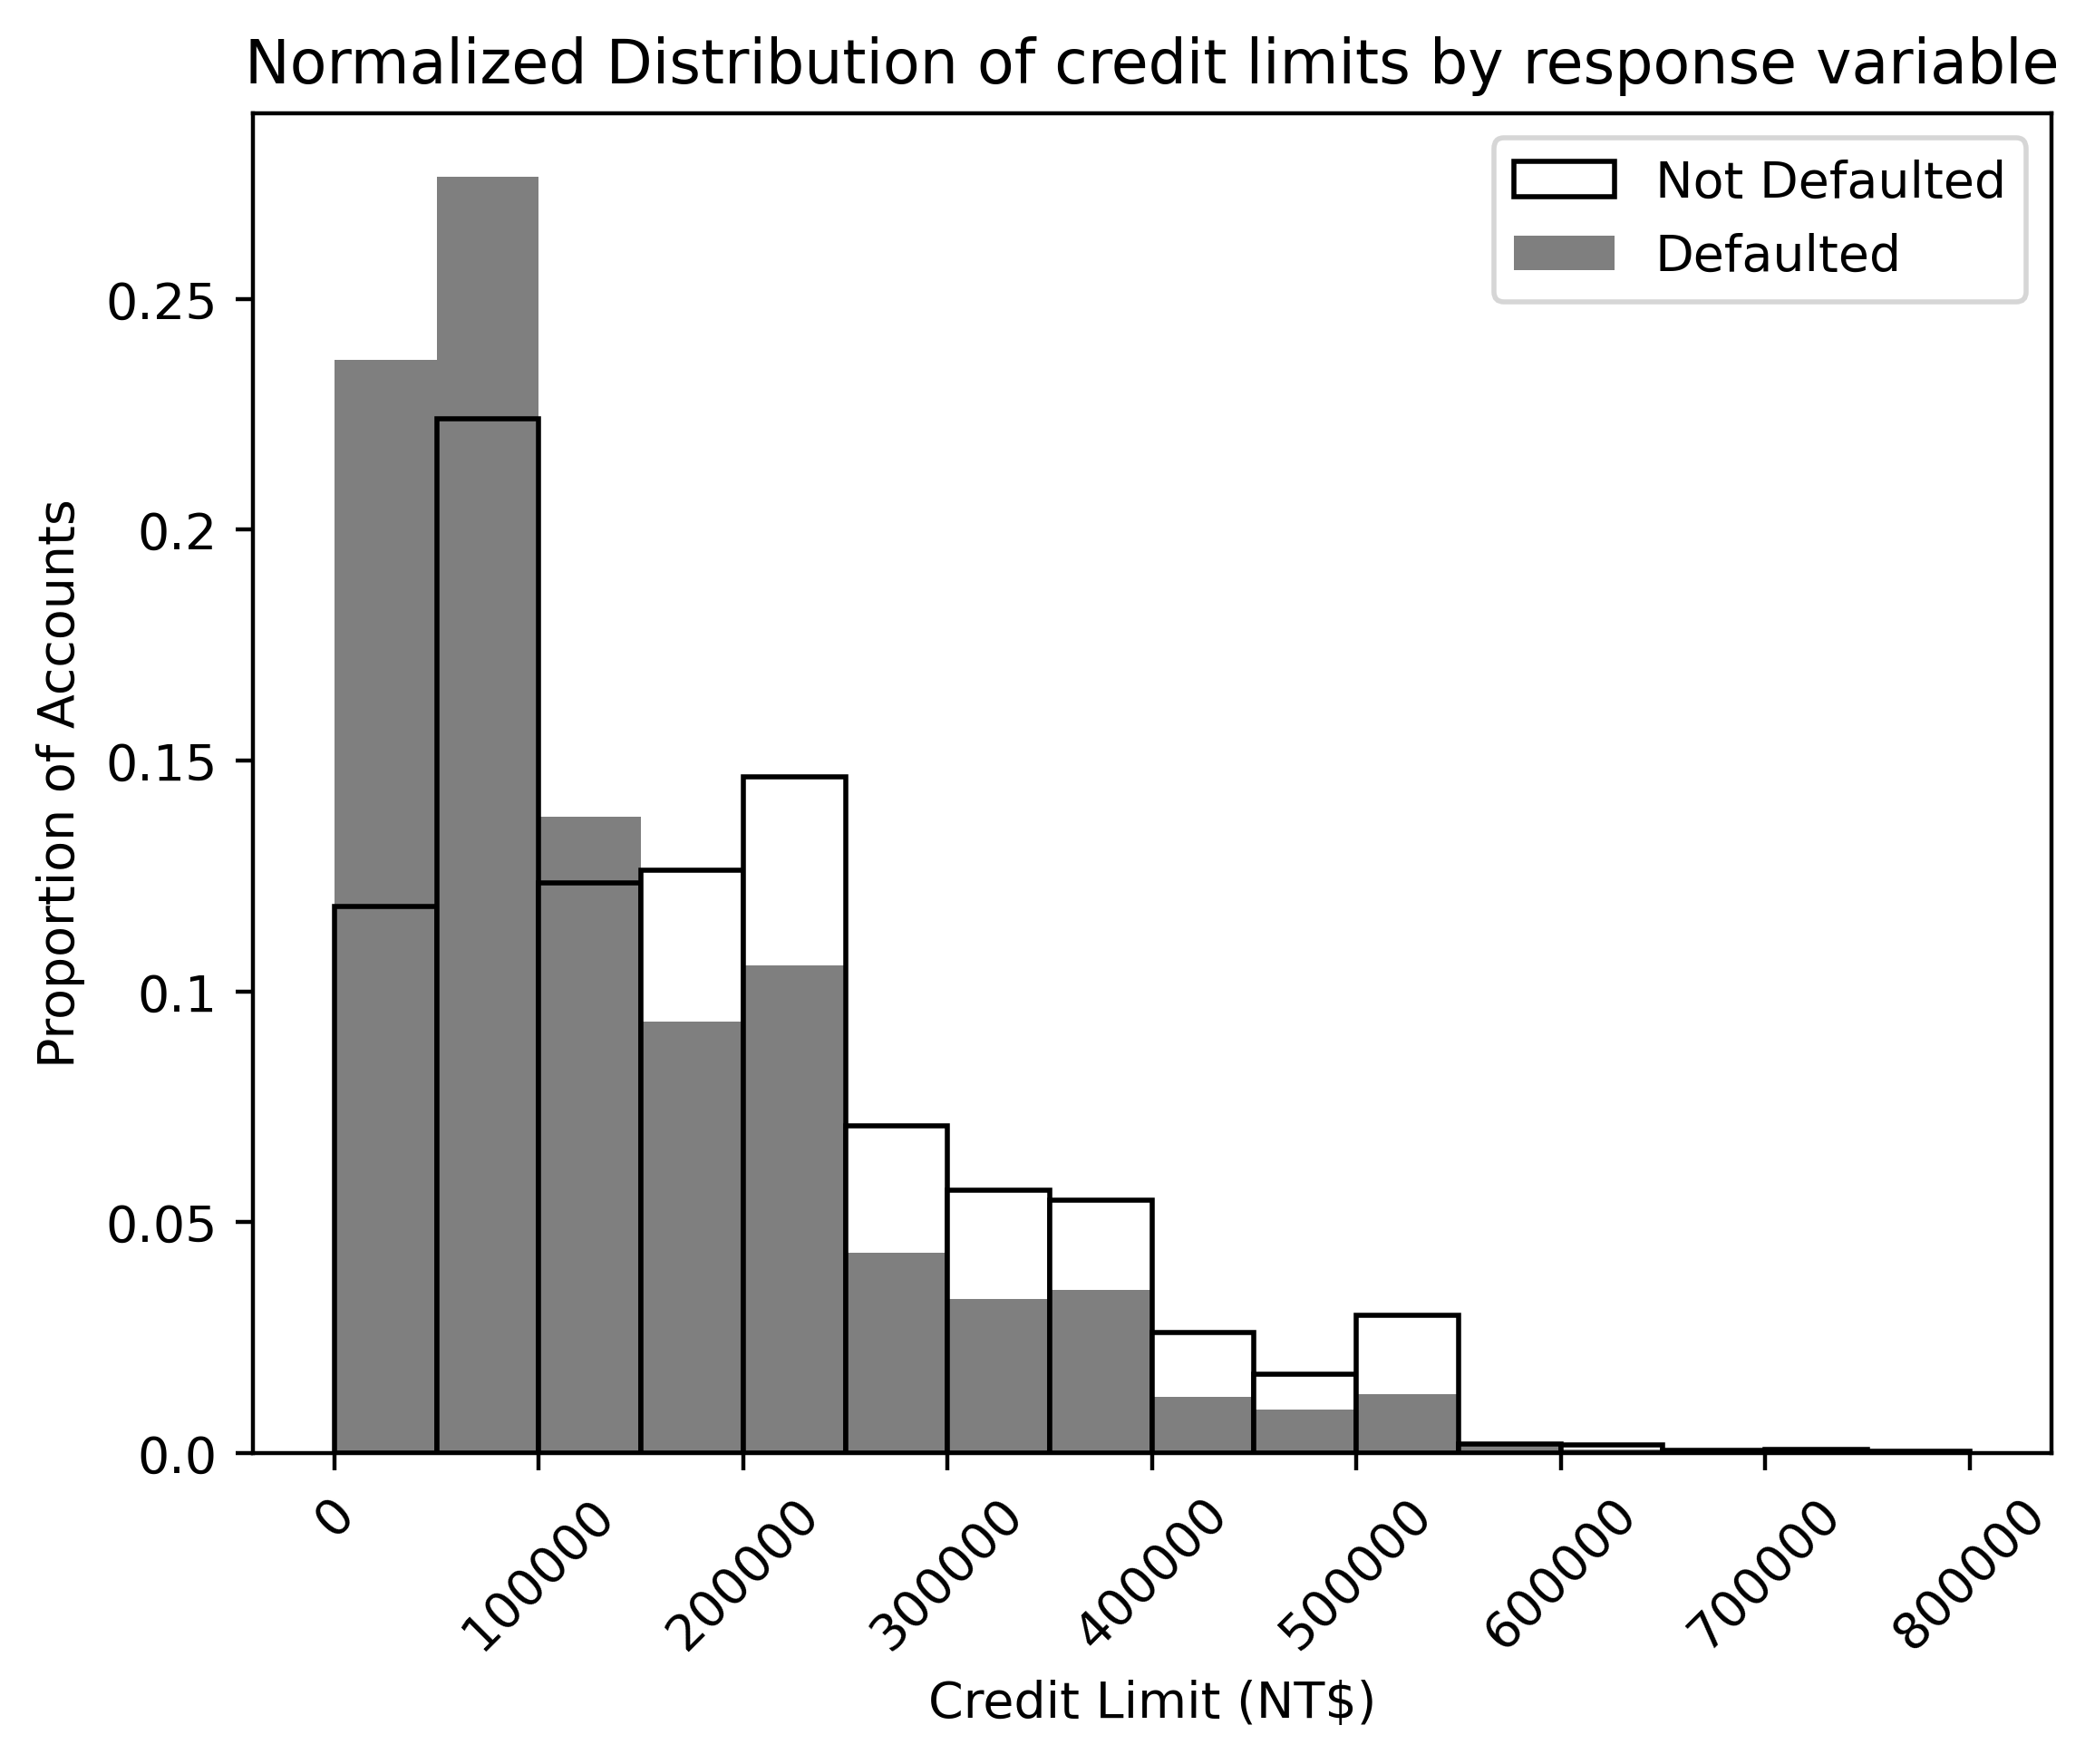

In [30]:
mpl.rcParams['figure.dpi'] = 400
axes = plt.axes()
axes.hist(
    df.loc[neg, 'LIMIT_BAL'],
    bins=bin_edges, density=True, edgecolor='black', color='white')
axes.hist(
    df.loc[pos, 'LIMIT_BAL'],
    bins=bin_edges, density=True, alpha=0.5, edgecolor=None, color='black')
axes.tick_params(axis='x', labelrotation=45)
axes.set_xlabel('Credit Limit (NT$)')
axes.set_ylabel('Proportion of Accounts')
y_ticks = axes.get_yticks()
axes.set_yticklabels(np.round(y_ticks*50000,2))
axes.legend(['Not Defaulted', 'Defaulted'])
axes.set_title('Normalized Distribution of credit limits by response variable')

The more riskier the account, the less limit it get.

Before we implement Logistic Regression, we should know how it works first. There is the equation:
<h2 align="center">
  $$ f(X) = sigmoid(X) = \frac{1}{1 + e^{-x}} $$
</h2>

As you can see, this function involve **irrational number e**, which knows as the base of **natural algortihm**, in contras of using base 10 logarithm in previous data exploration. To compute it, we can use Numpy function of **exp**, that take e into the input exponent automatically.  

**Demonstration of Logistic Regression**

In [31]:
X_exp = np.linspace(-4,4,81)
print(X_exp[:5])
print(X_exp[-5:])

[-4.  -3.9 -3.8 -3.7 -3.6]
[3.6 3.7 3.8 3.9 4. ]


In [32]:
Y_exp = np.exp(X_exp)
Y_exp[:5]

array([0.01831564, 0.02024191, 0.02237077, 0.02472353, 0.02732372])

Those X and Y variable will be used as a data to plot the sigmoid function

Text(0.5, 1.0, 'Plot of $e^X$')

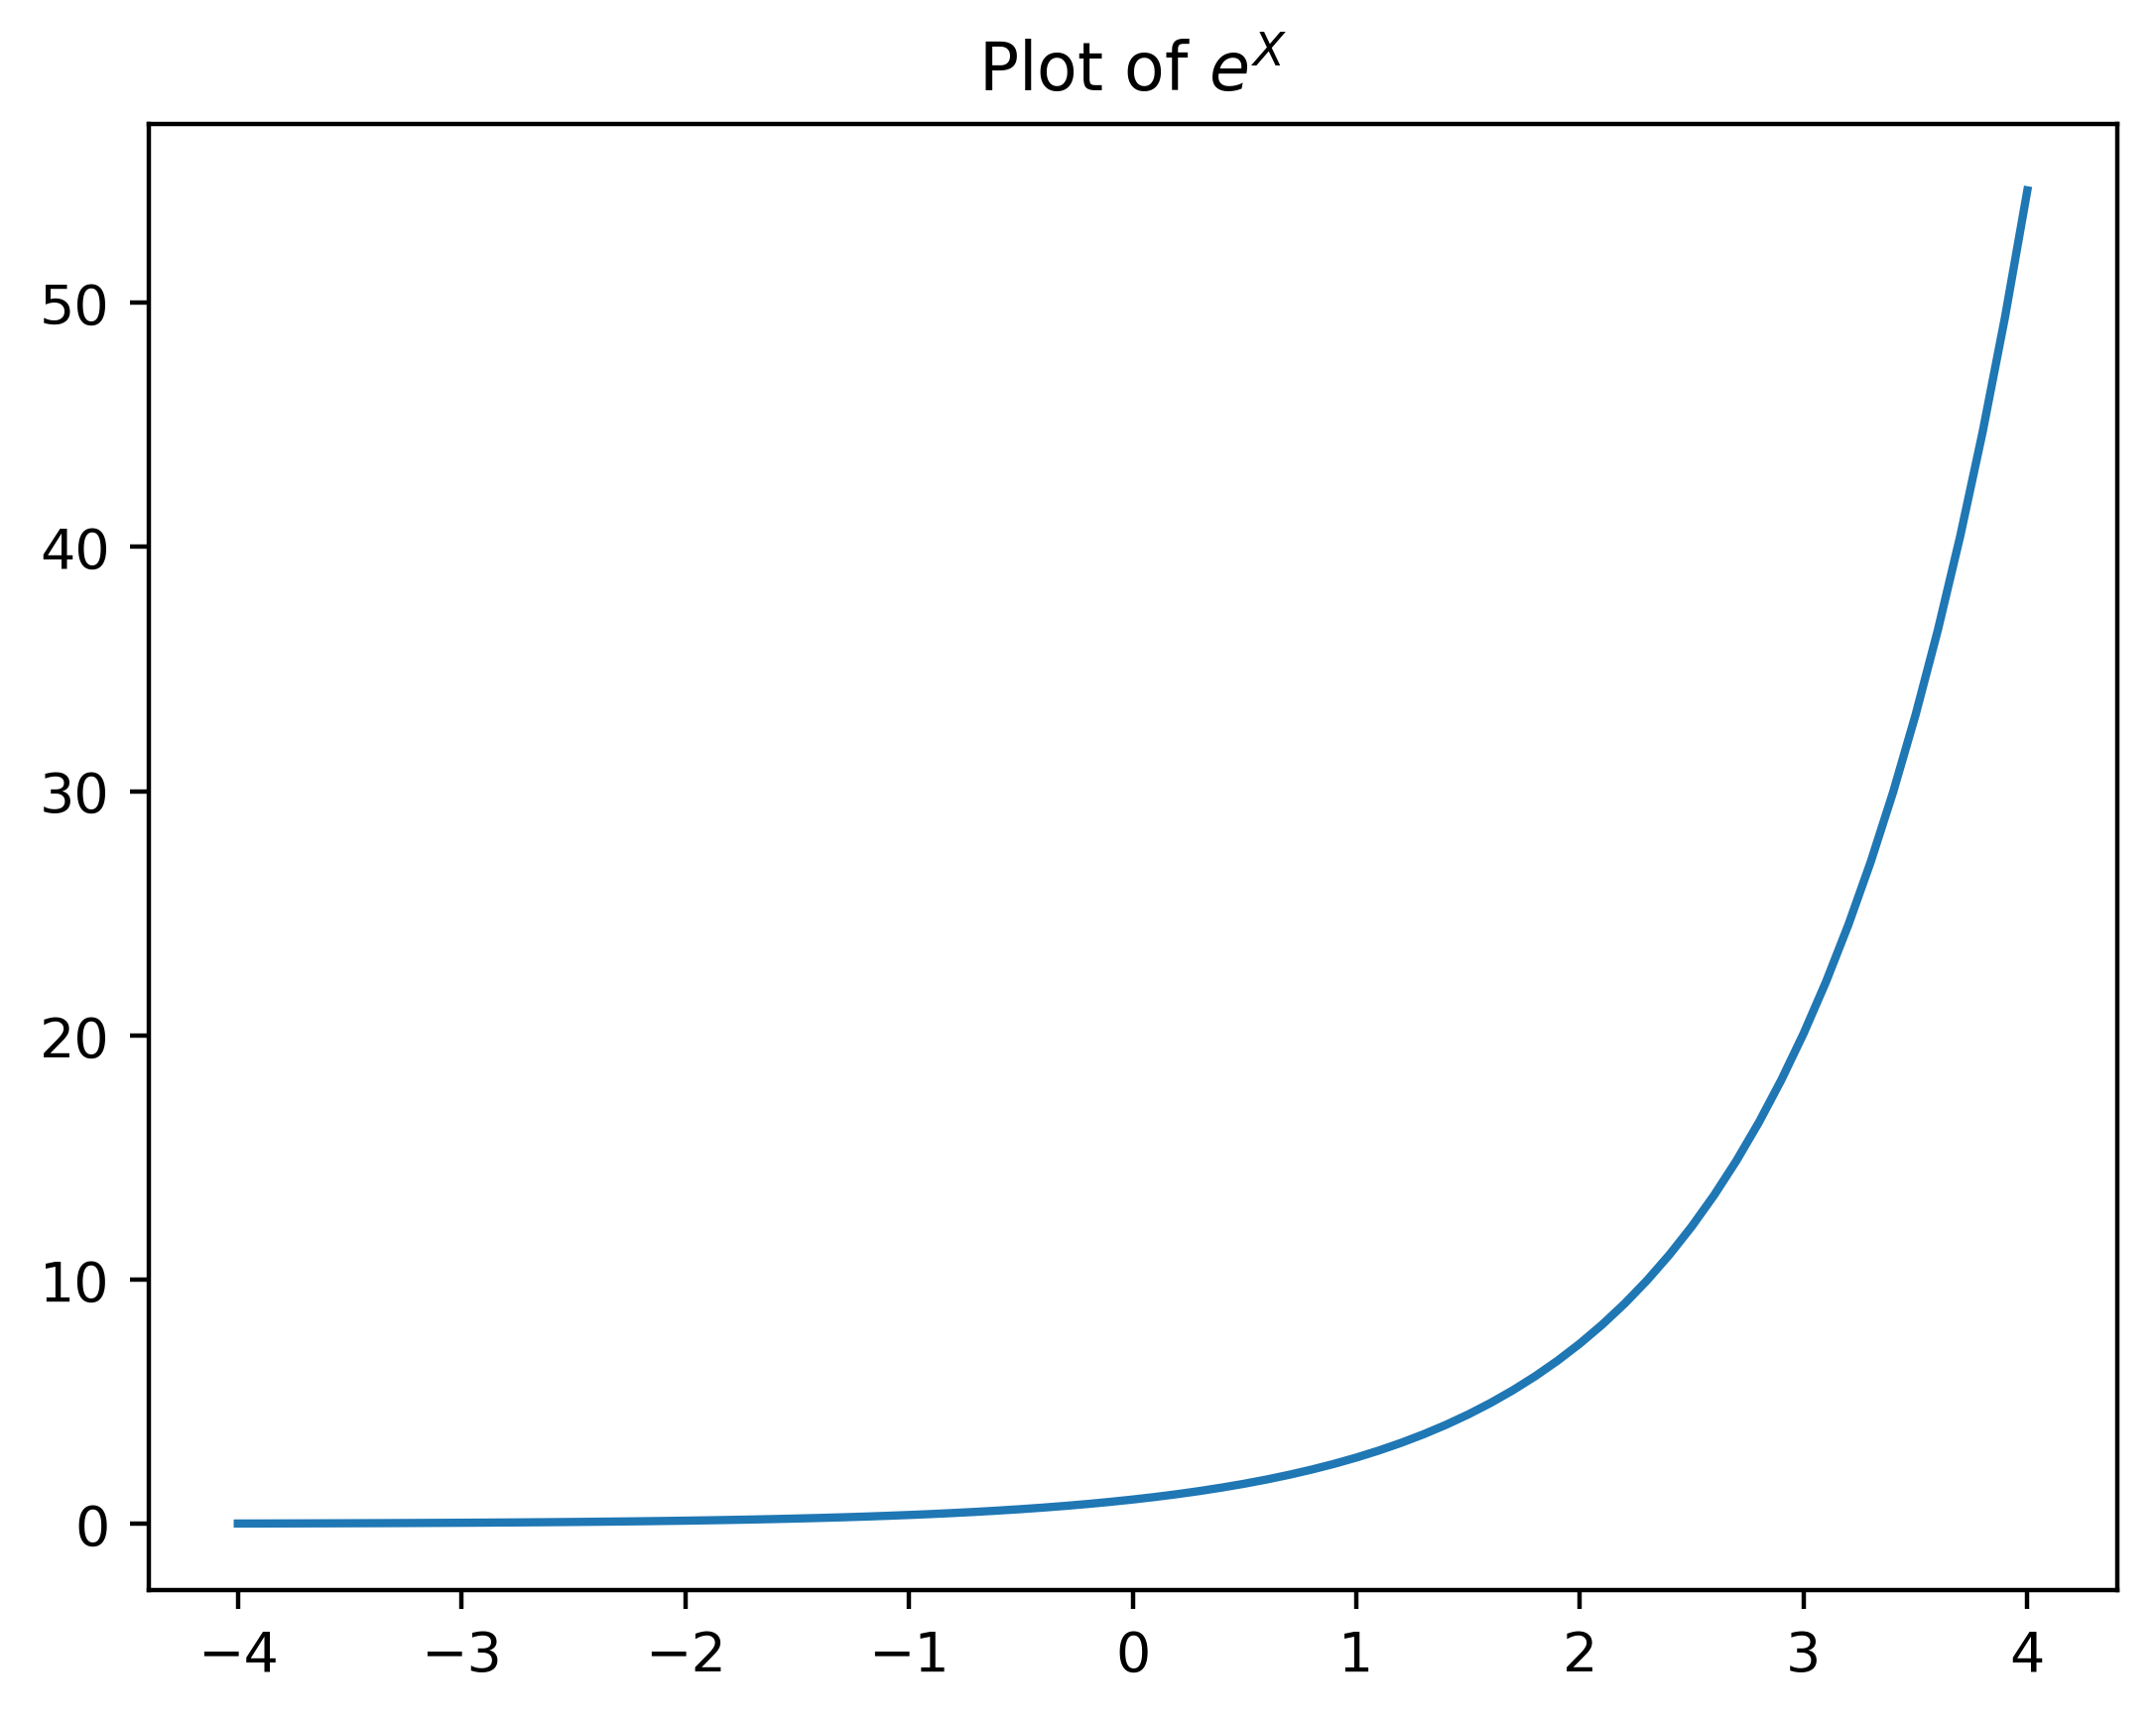

In [33]:
plt.plot(X_exp, Y_exp)
plt.title('Plot of $e^X$')

Now see the plot of $e^{-X}$

Text(0.5, 1.0, 'Plot of $e^{-X}$')

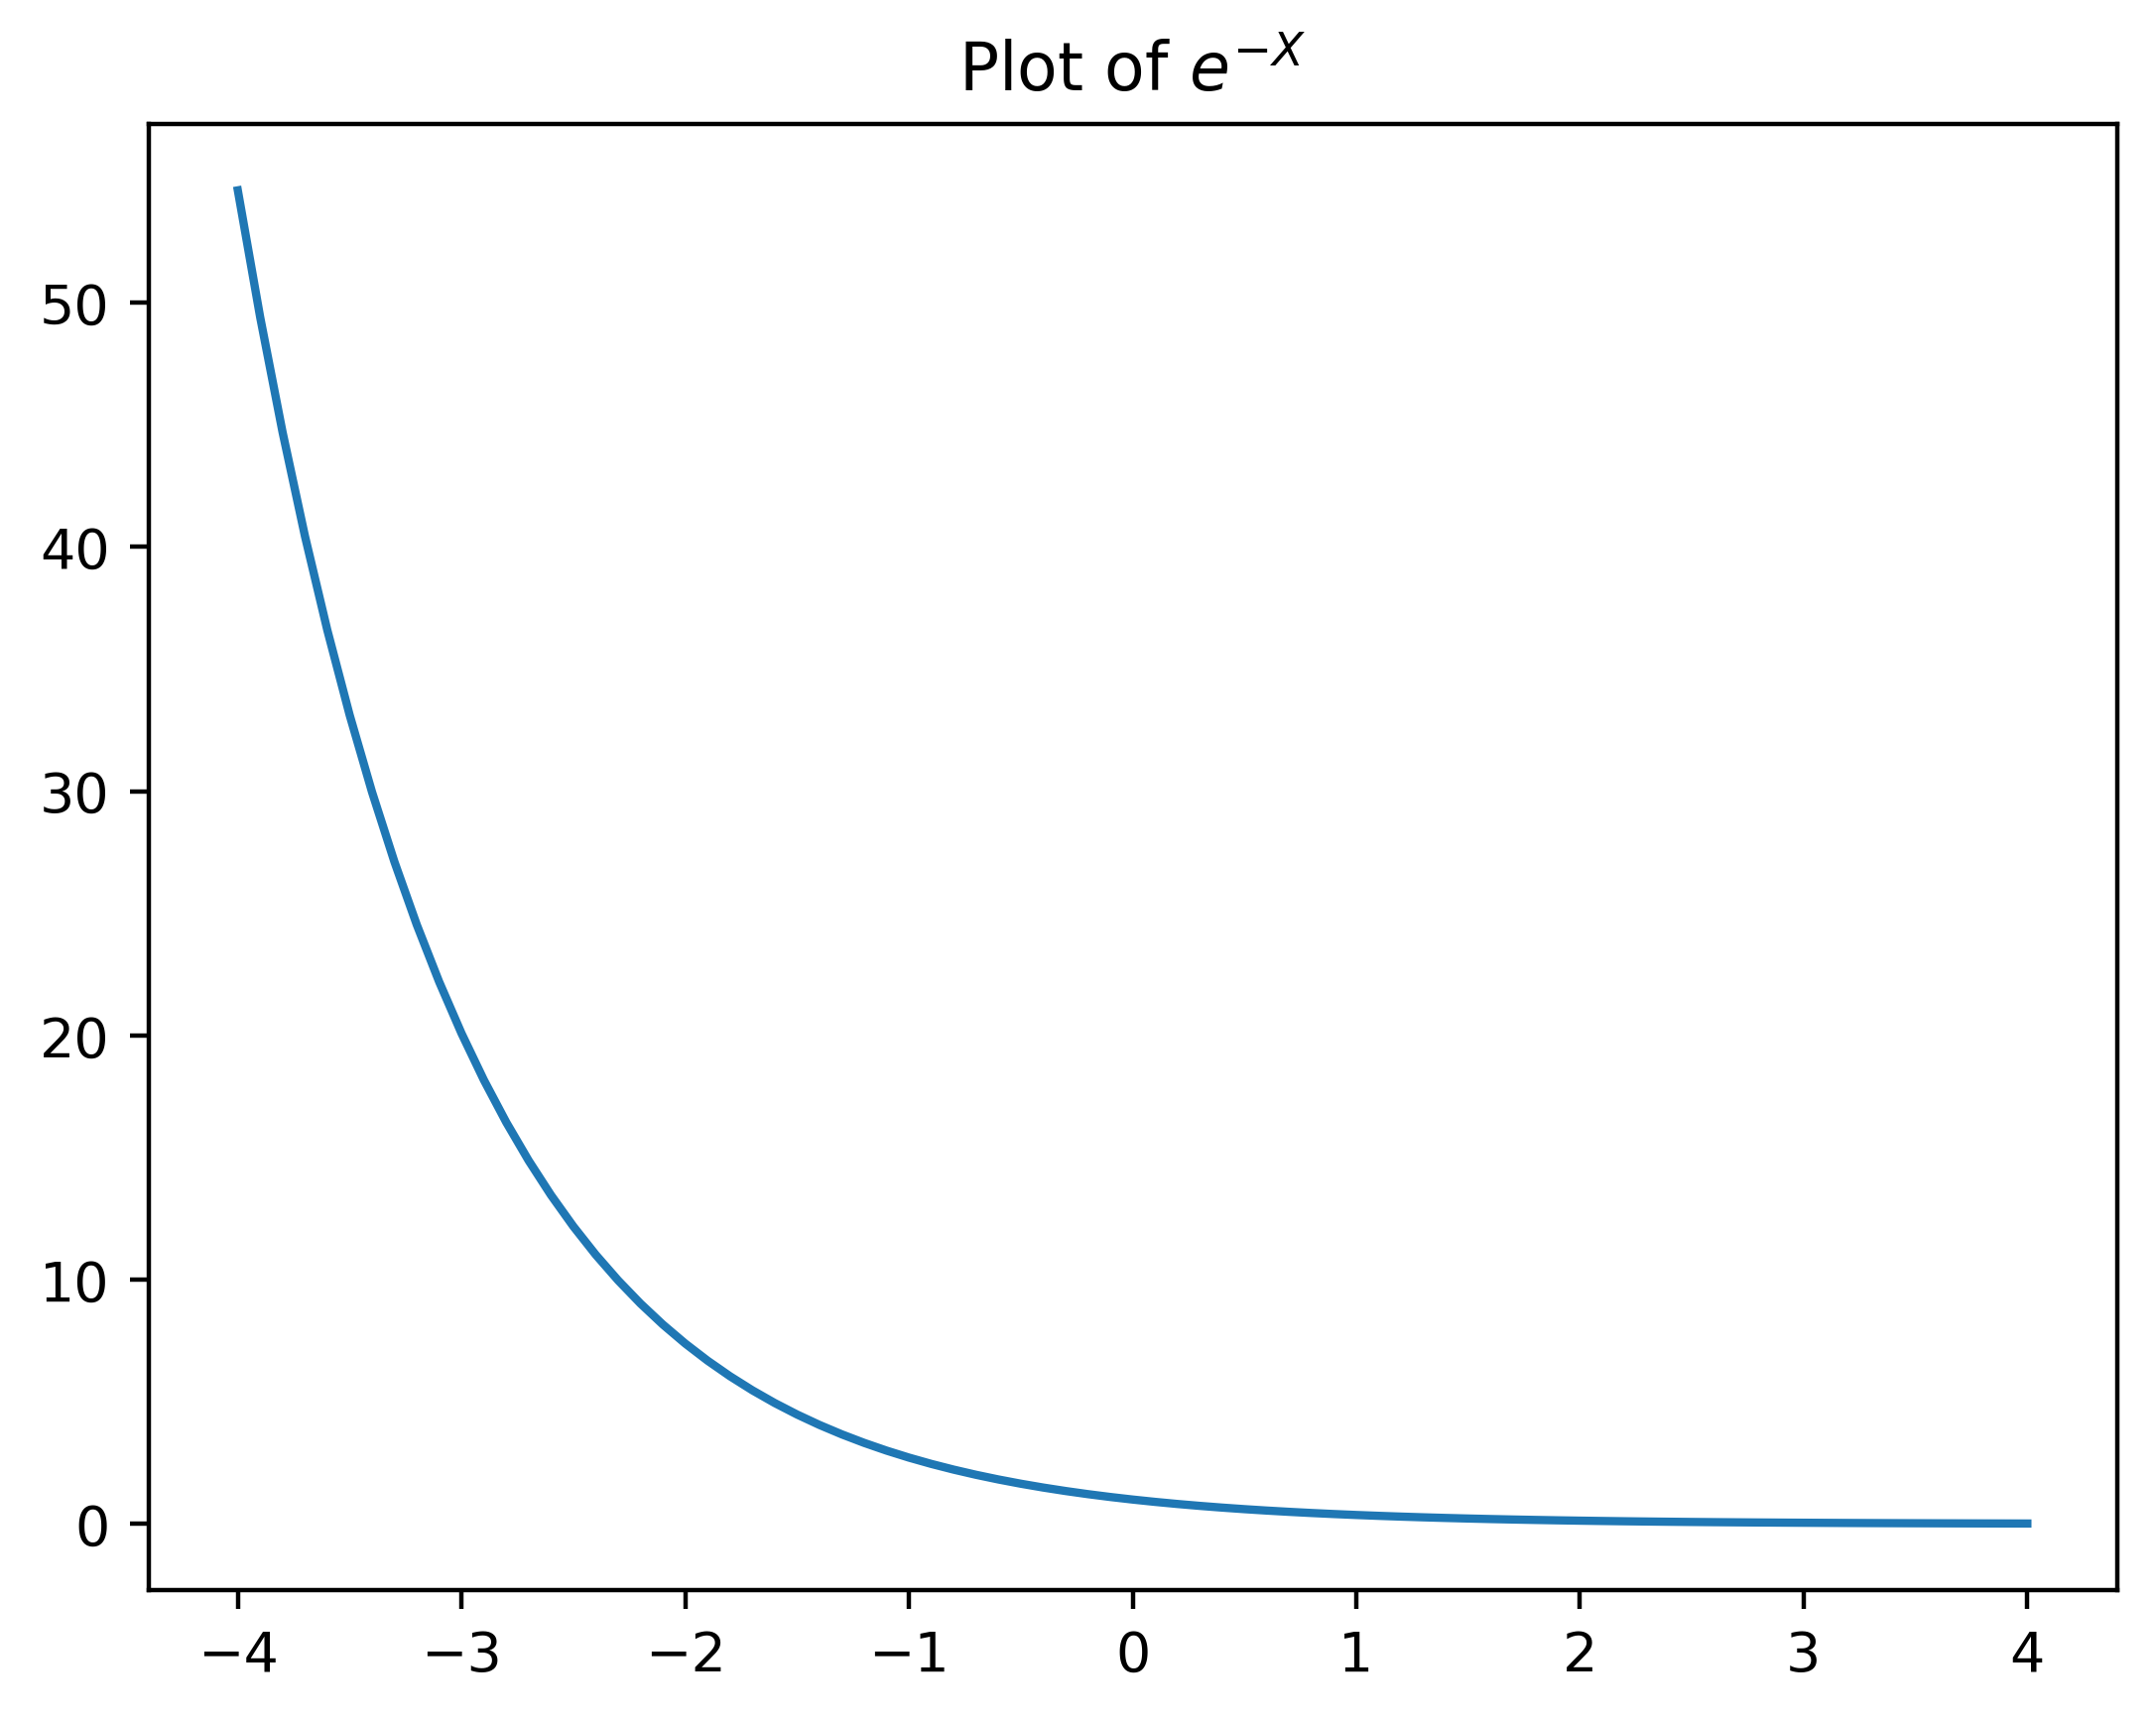

In [34]:
Y_exp = np.exp(-X_exp)
plt.plot(X_exp, Y_exp)
plt.title('Plot of $e^{-X}$')

The $e^{-X}$ is needed in Sigmoid Function because it can keep the value in the range of 0 to 1

In [35]:
# Defining Sigmoid Function
def sigmoid(X):
  Y = 1 / (1 + np.exp(-X))
  return Y

Text(0.5, 1.0, 'Sigmoid Function')

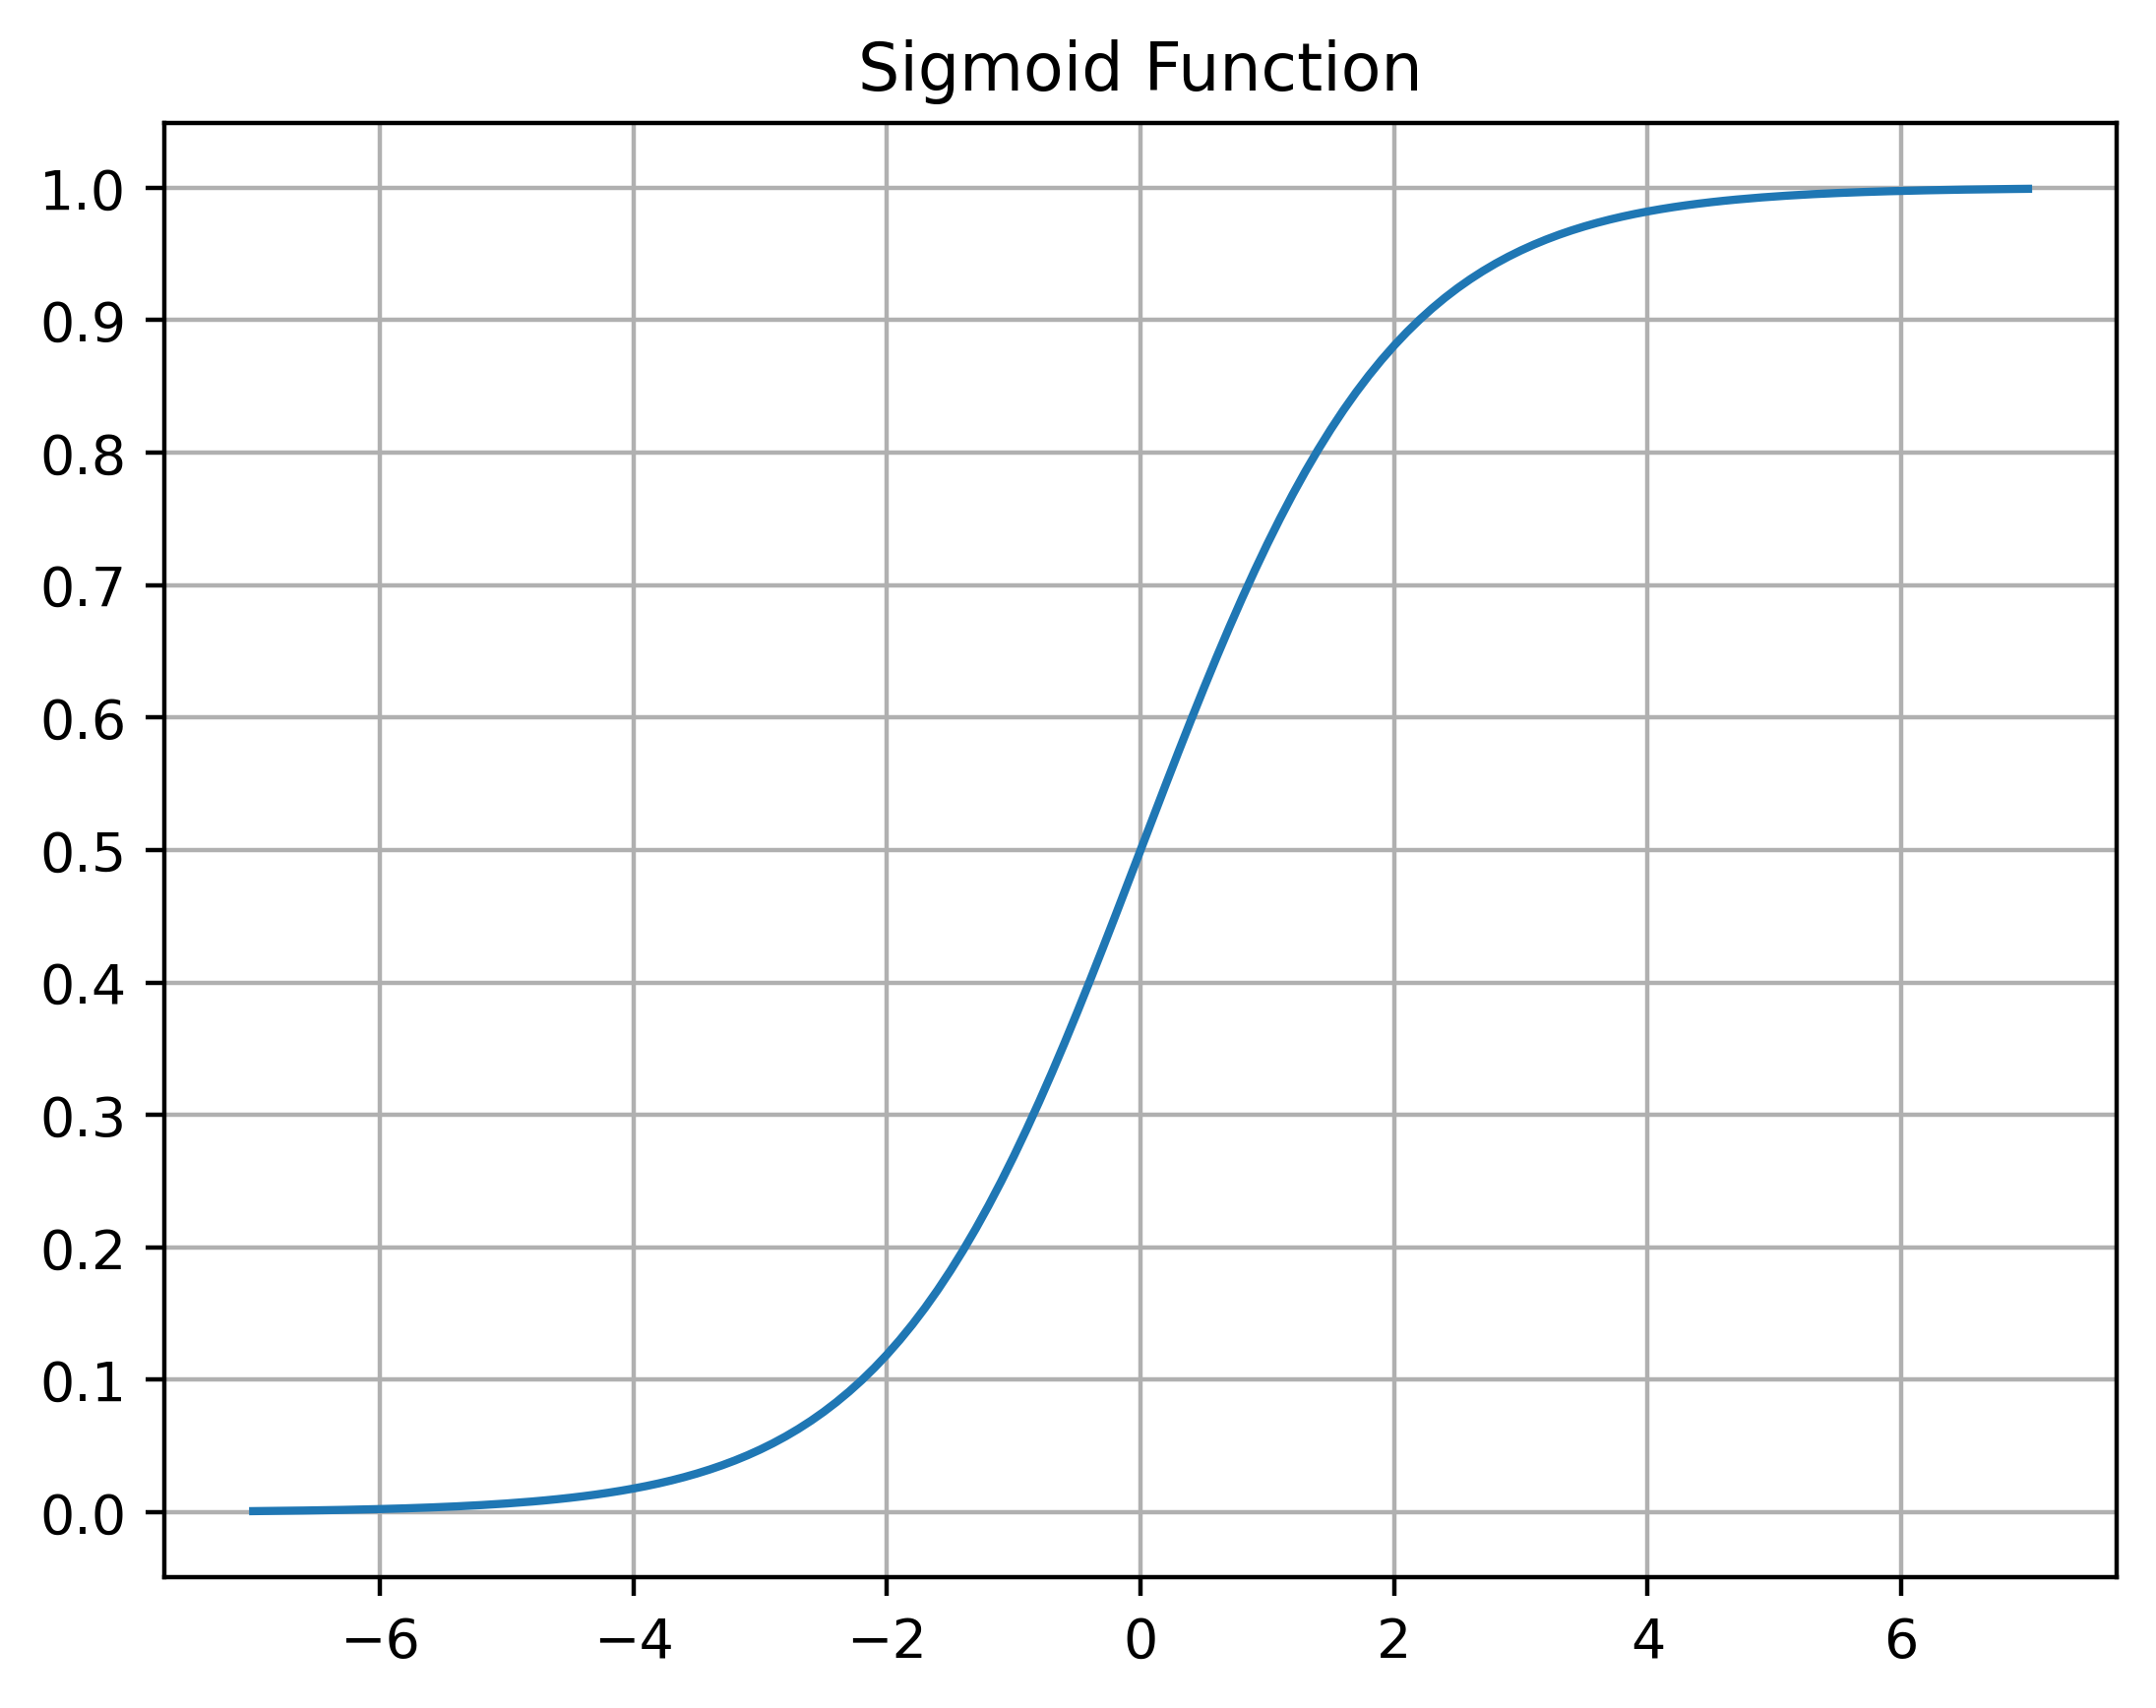

In [36]:
X_sig = np.linspace(-7,7,141)
Y_sig = sigmoid(X_sig)
plt.plot(X_sig, Y_sig)
plt.yticks(np.linspace(0,1,11))
plt.grid()
plt.title('Sigmoid Function')

**Examine the Features Linearity Again for Logistic Regression**

In [37]:
dr_pay

,default payment next month
PAY_1,
-2,0.131664
-1,0.170002
0,0.128295
1,0.336400
2,0.694701
3,0.773973
4,0.682540
5,0.434783
6,0.545455


In [38]:
# Extract mean value and store it in p variable
p = dr_pay.values

In [39]:
q = 1-p
print(p)
print(q)

[0.13166397 0.17000198 0.12829525 0.33639988 0.69470143 0.7739726
 0.68253968 0.43478261 0.54545455 0.77777778 0.58823529]
[0.86833603 0.82999802 0.87170475 0.66360012 0.30529857 0.2260274
 0.31746032 0.56521739 0.45454545 0.22222222 0.41176471]


In [40]:
# Calculate the odd ration from p and q, and the log odds to
odd_ratio = p/q
log_odd = np.log(odd_ratio)
log_odd

array([-1.88632574, -1.58561322, -1.91611649, -0.67937918,  0.82219194,
        1.23088026,  0.76546784, -0.26236426,  0.18232156,  1.25276297,
        0.35667494])

In [41]:
dr_pay.index

Index([-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64', name='PAY_1')

Text(0.5, 0, 'Values of PAY_1')

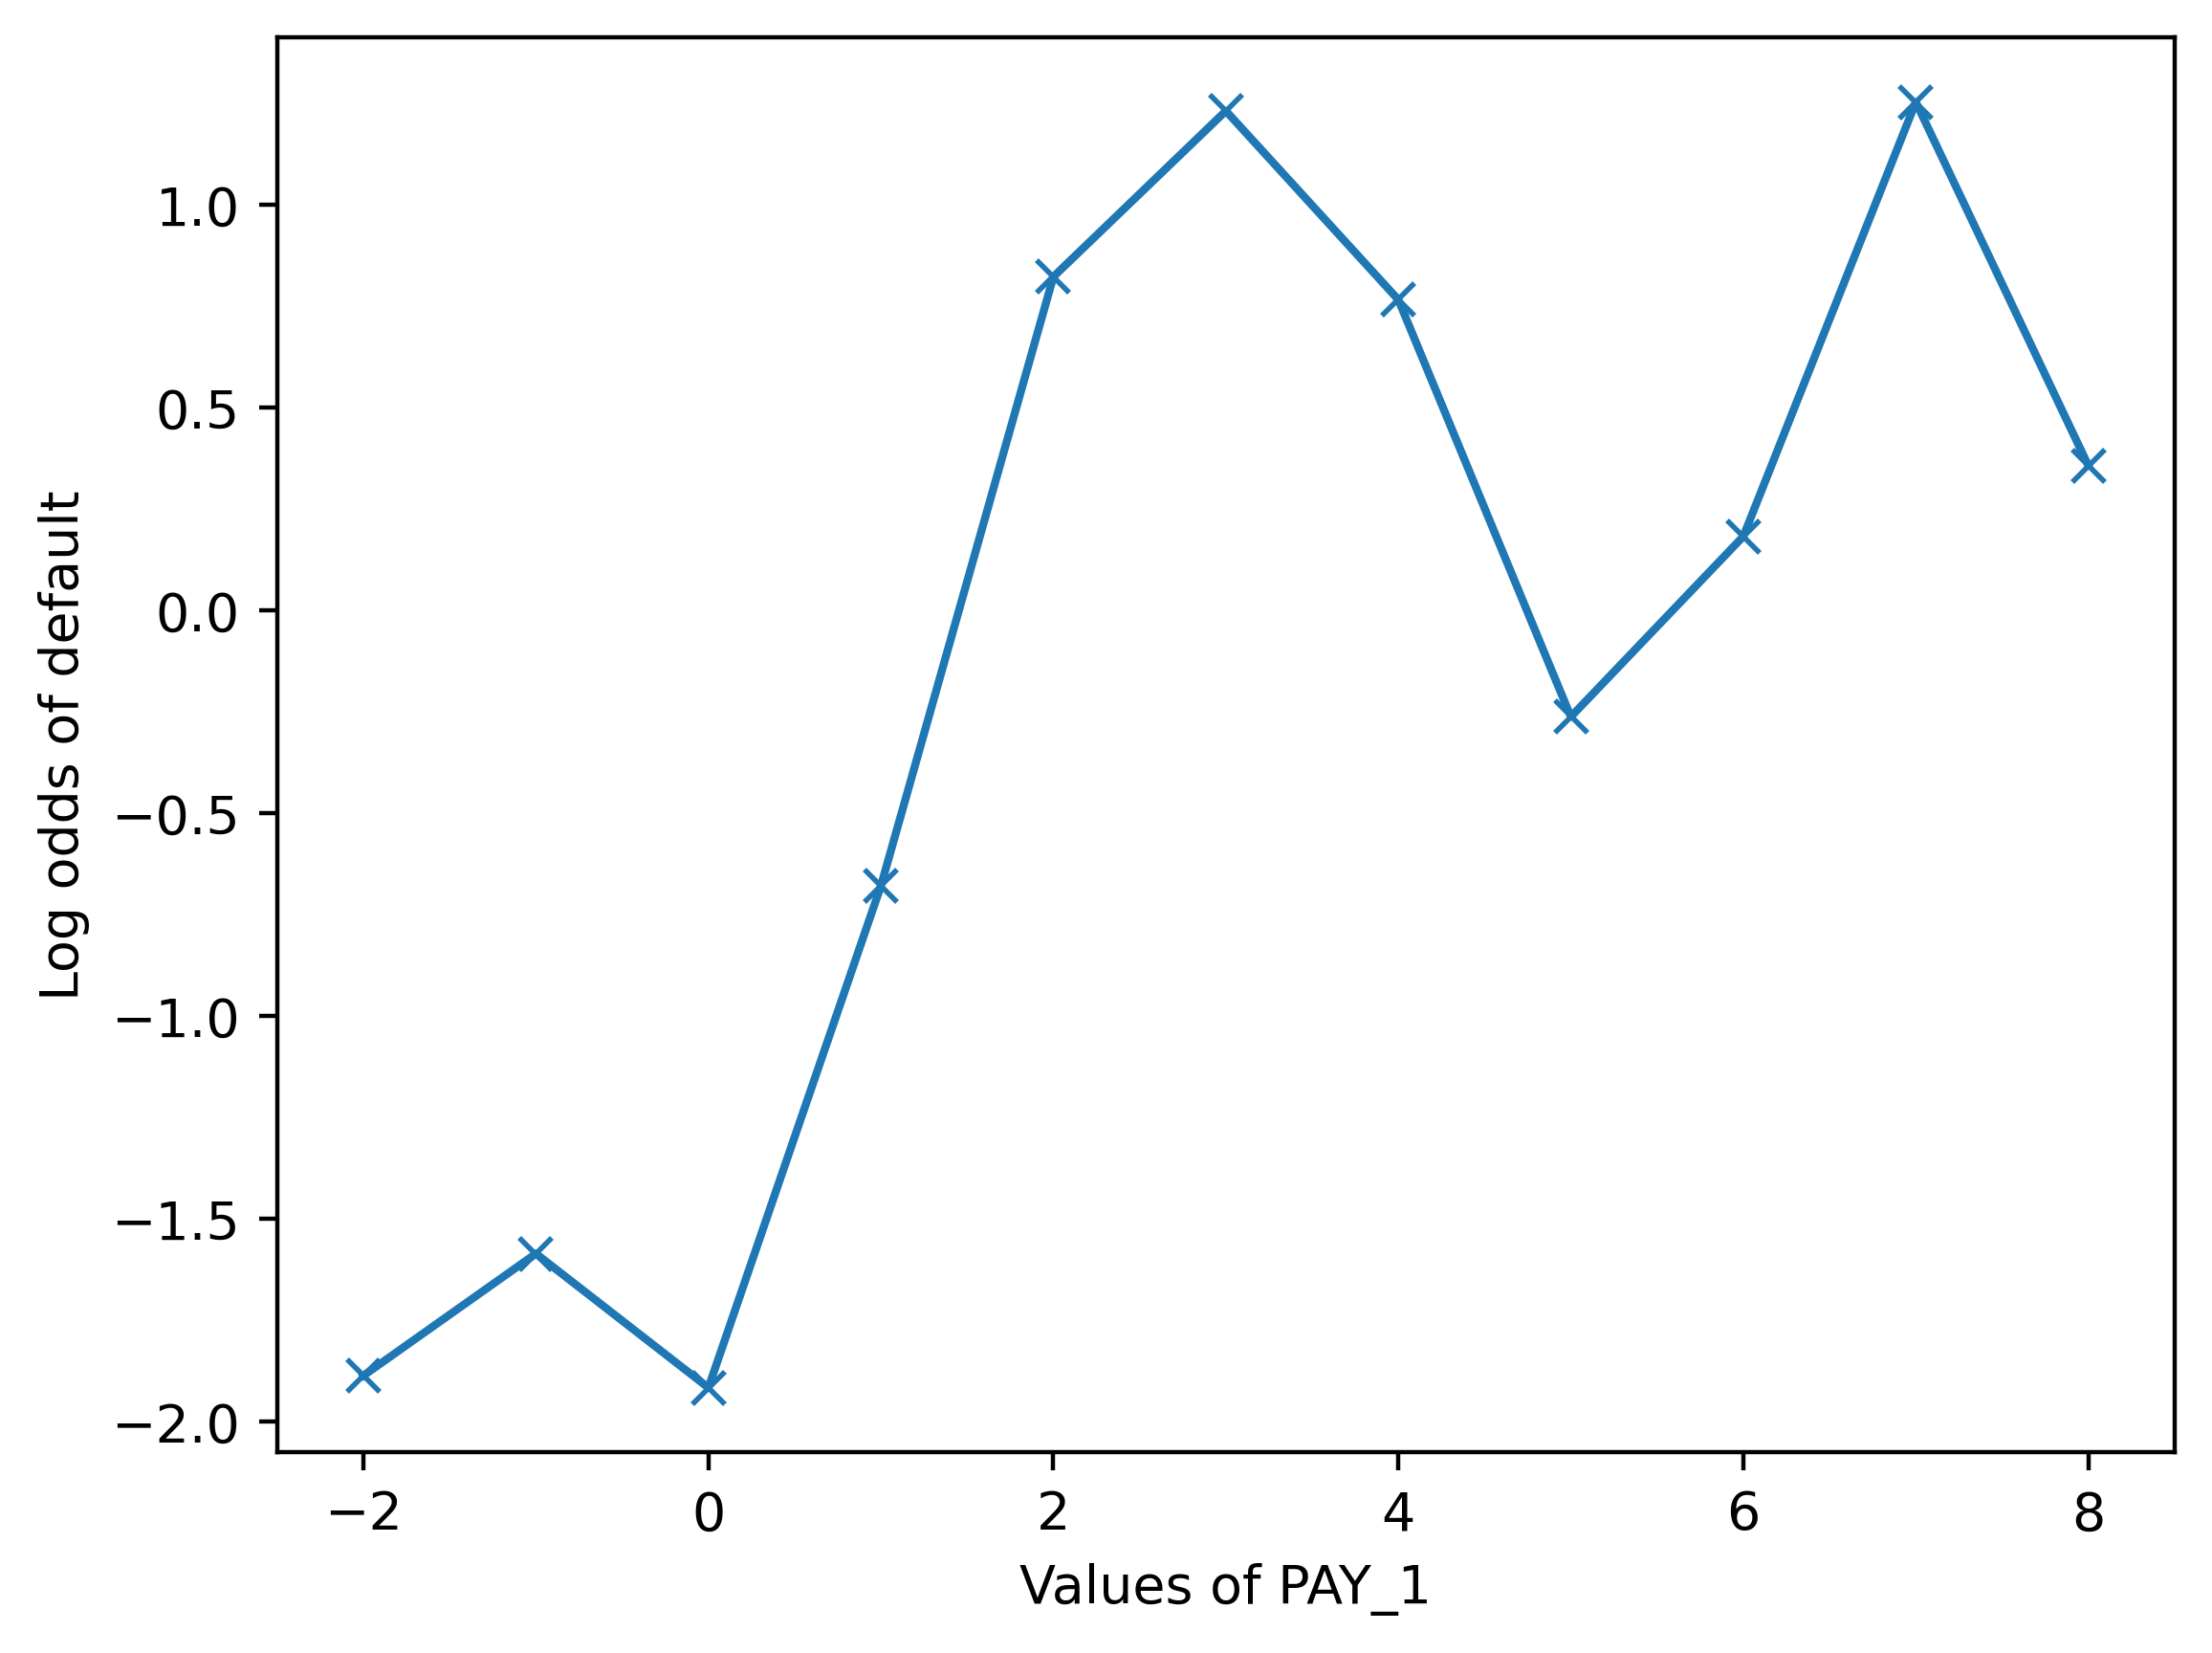

In [42]:
plt.plot(dr_pay.index, log_odd, '-x')
plt.ylabel('Log odds of default')
plt.xlabel('Values of PAY_1')

The relationship between log odds of the response variable with the PAY_1 feature is not all different with the relationship between the rate of default with PAY_1 feature. We can see the shape of data, i'ts not linear, thus using Logistic Regression Algorithm is commended.

**Linear Decision Boundary**

We need to see hot it works in Logistic Regression. Synthetic data will be used in this step.

In [43]:
from numpy.random import default_rng
rg = default_rng(4)
X_1_pos = rg.uniform(low=1, high=7, size=(20,1))
print(X_1_pos[0:3])
X_1_neg = rg.uniform(low=3, high=10, size=(20,1))
print(X_1_neg[0:3])
X_2_pos = rg.uniform(low=1, high=7, size=(20,1))
print(X_2_pos[0:3])
X_2_neg = rg.uniform(low=3, high=10, size=(20,1))
print(X_2_neg[0:3])

[[6.65833663]
 [4.06796532]
 [6.85746223]]
[[7.93405322]
 [9.59962575]
 [7.65960192]]
[[5.15531227]
 [5.6237829 ]
 [2.14473103]]
[[6.49784918]
 [9.69185251]
 [9.32236912]]


/tmp/ipython-input-65672150.py:6: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend('Positive Class', 'Negative Class')


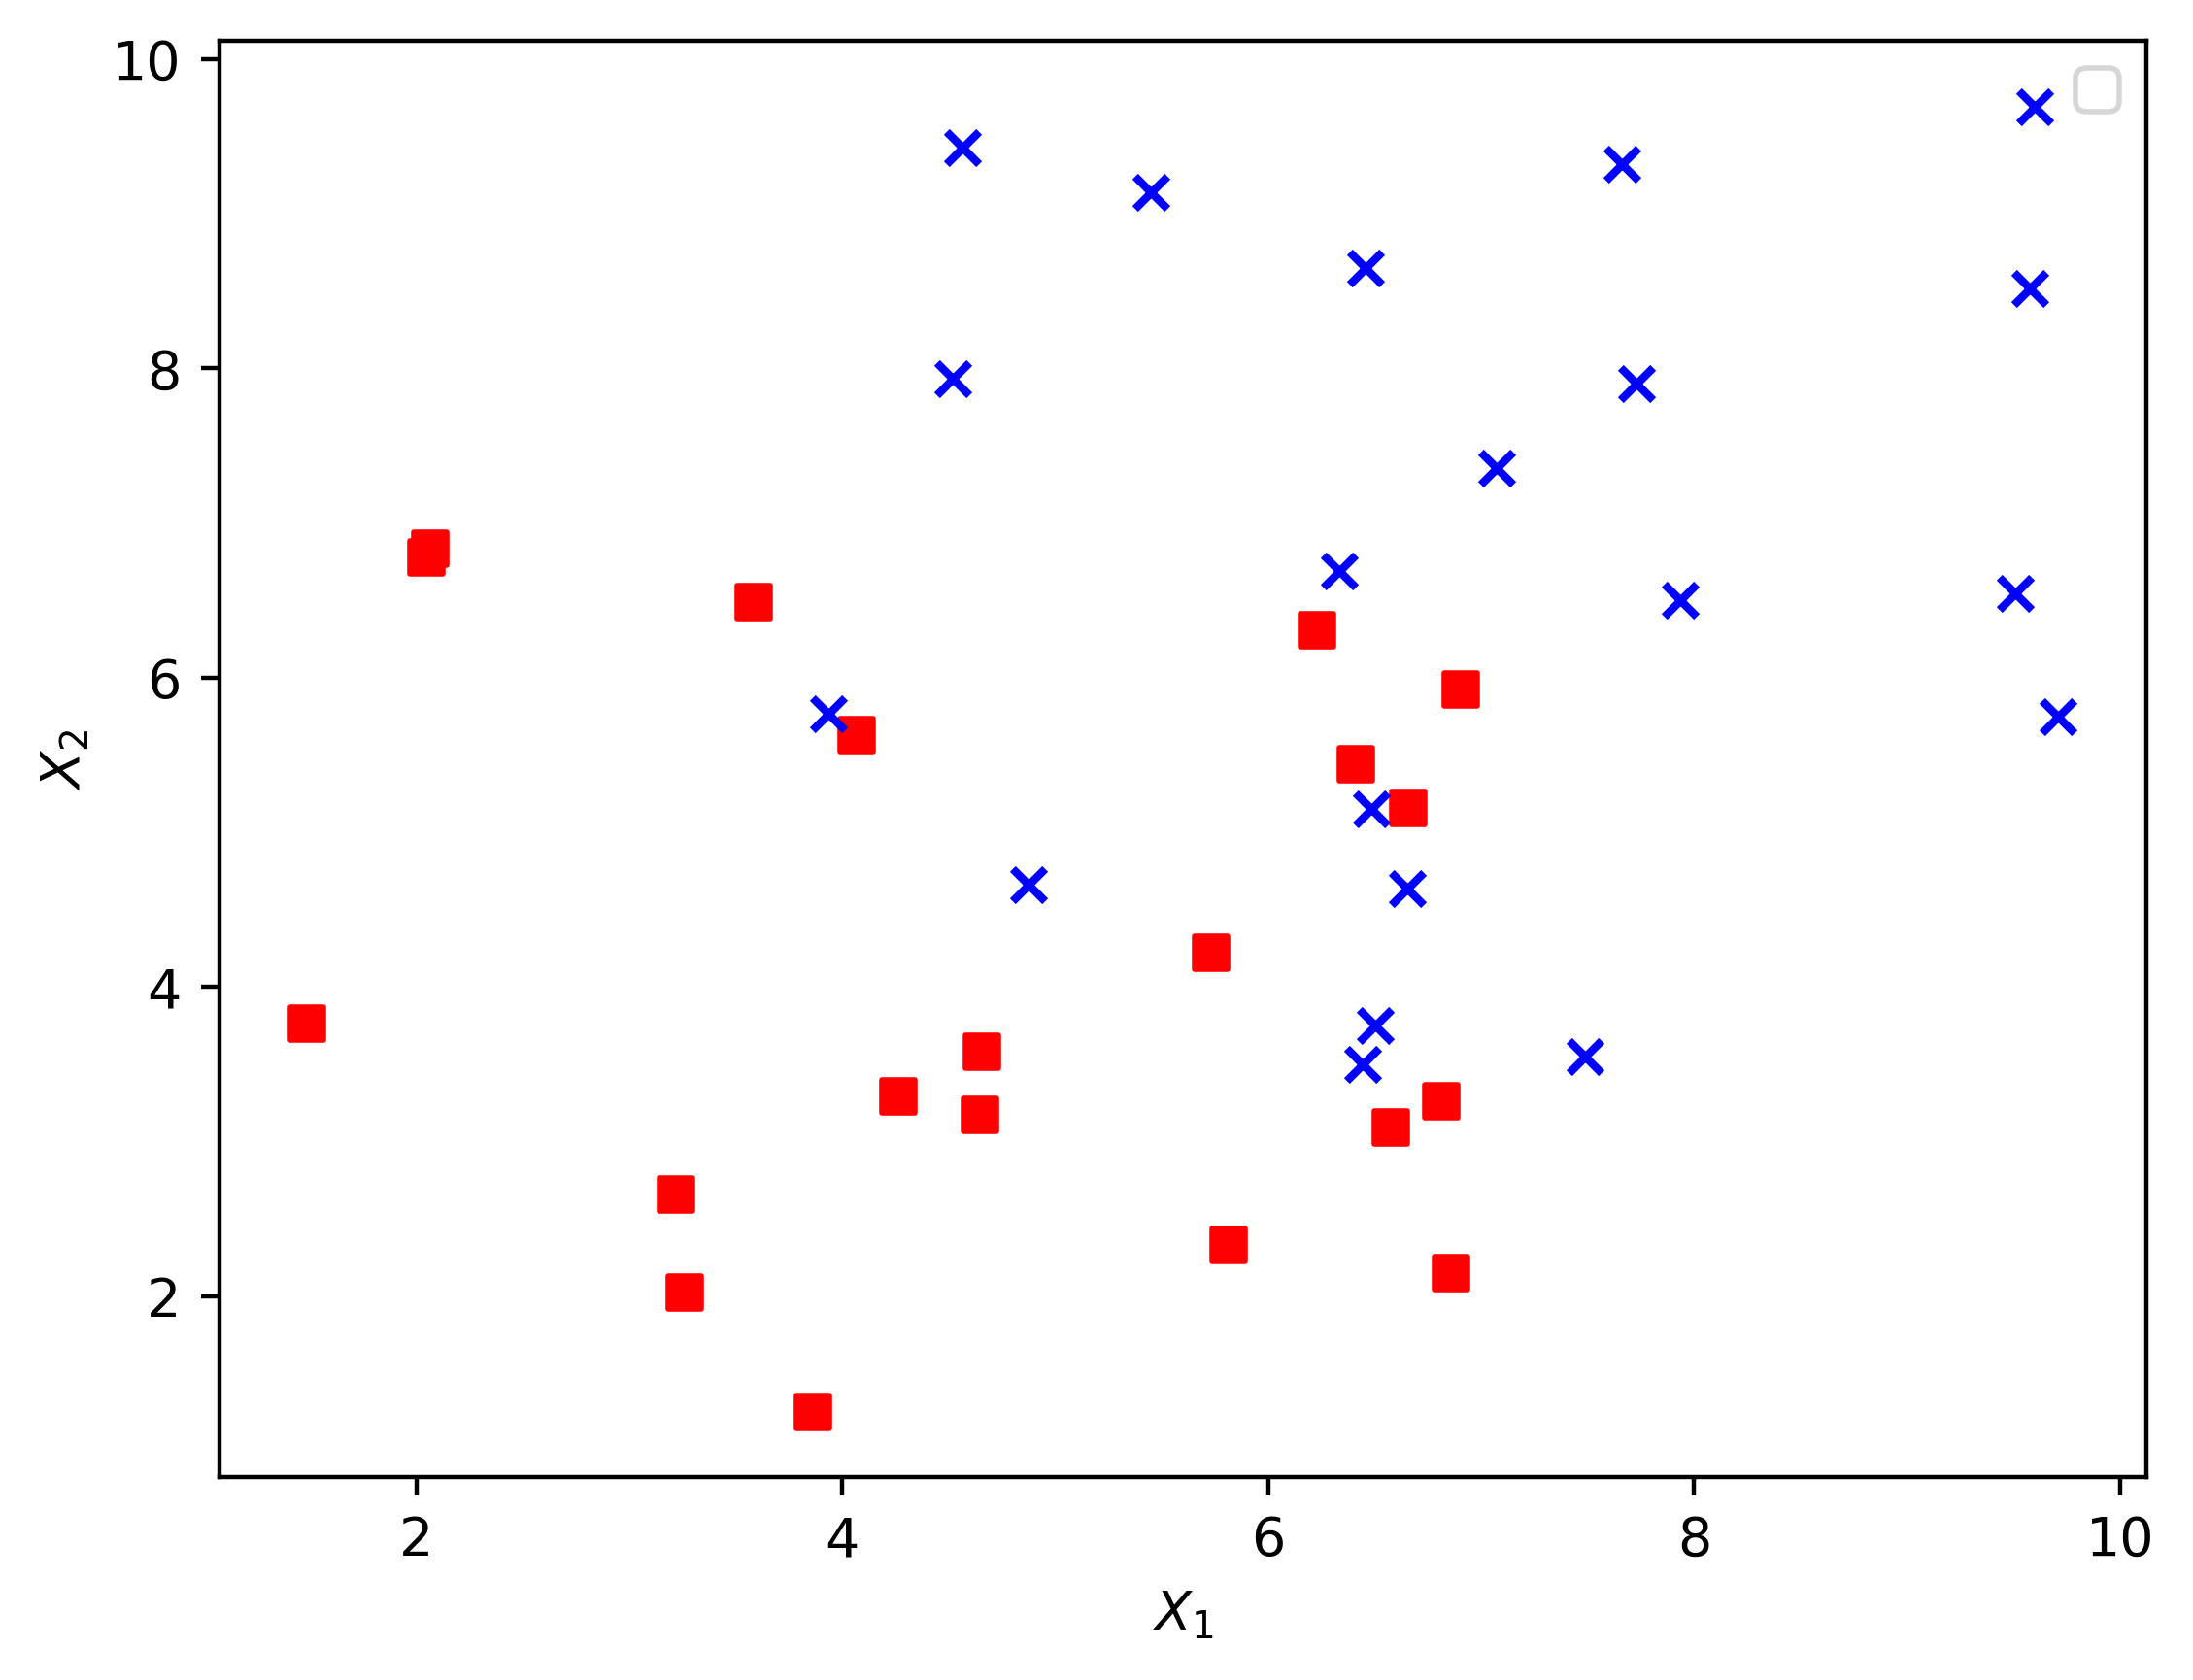

In [44]:
# Plot the data
plt.scatter(X_1_pos, X_2_pos, color='red', marker='s')
plt.scatter(X_1_neg, X_2_neg, color='blue', marker='x')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend('Positive Class', 'Negative Class')

In [45]:
# Creating Matrix
X = np.block([[X_1_pos, X_2_pos], [X_1_neg, X_2_neg]])
print(X.shape)
print(X[0:3])

(40, 2)
[[6.65833663 5.15531227]
 [4.06796532 5.6237829 ]
 [6.85746223 2.14473103]]


In [46]:
# Create a vertical stack
y = np.vstack((np.ones(20), np.zeros(20))).reshape(40,)
print(y[0:5])
print(y[-5:])

[1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0.]


In [47]:
logreg = LogisticRegression(solver='liblinear')
logreg

LogisticRegression(solver='liblinear')

In [48]:
# Train the model with synthetic data
logreg.fit(X,y)

LogisticRegression(solver='liblinear')

In [49]:
y_pred = logreg.predict(X)
pos_indices = [counter for counter in range(len(y_pred)) if y_pred[counter]==1]
neg_indices = [counter for counter in range(len(y_pred)) if y_pred[counter]==0]
print(pos_indices)
print(neg_indices)

[2, 3, 4, 5, 6, 7, 9, 11, 13, 15, 16, 17, 18, 19, 26, 34, 36]
[0, 1, 8, 10, 12, 14, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 35, 37, 38, 39]


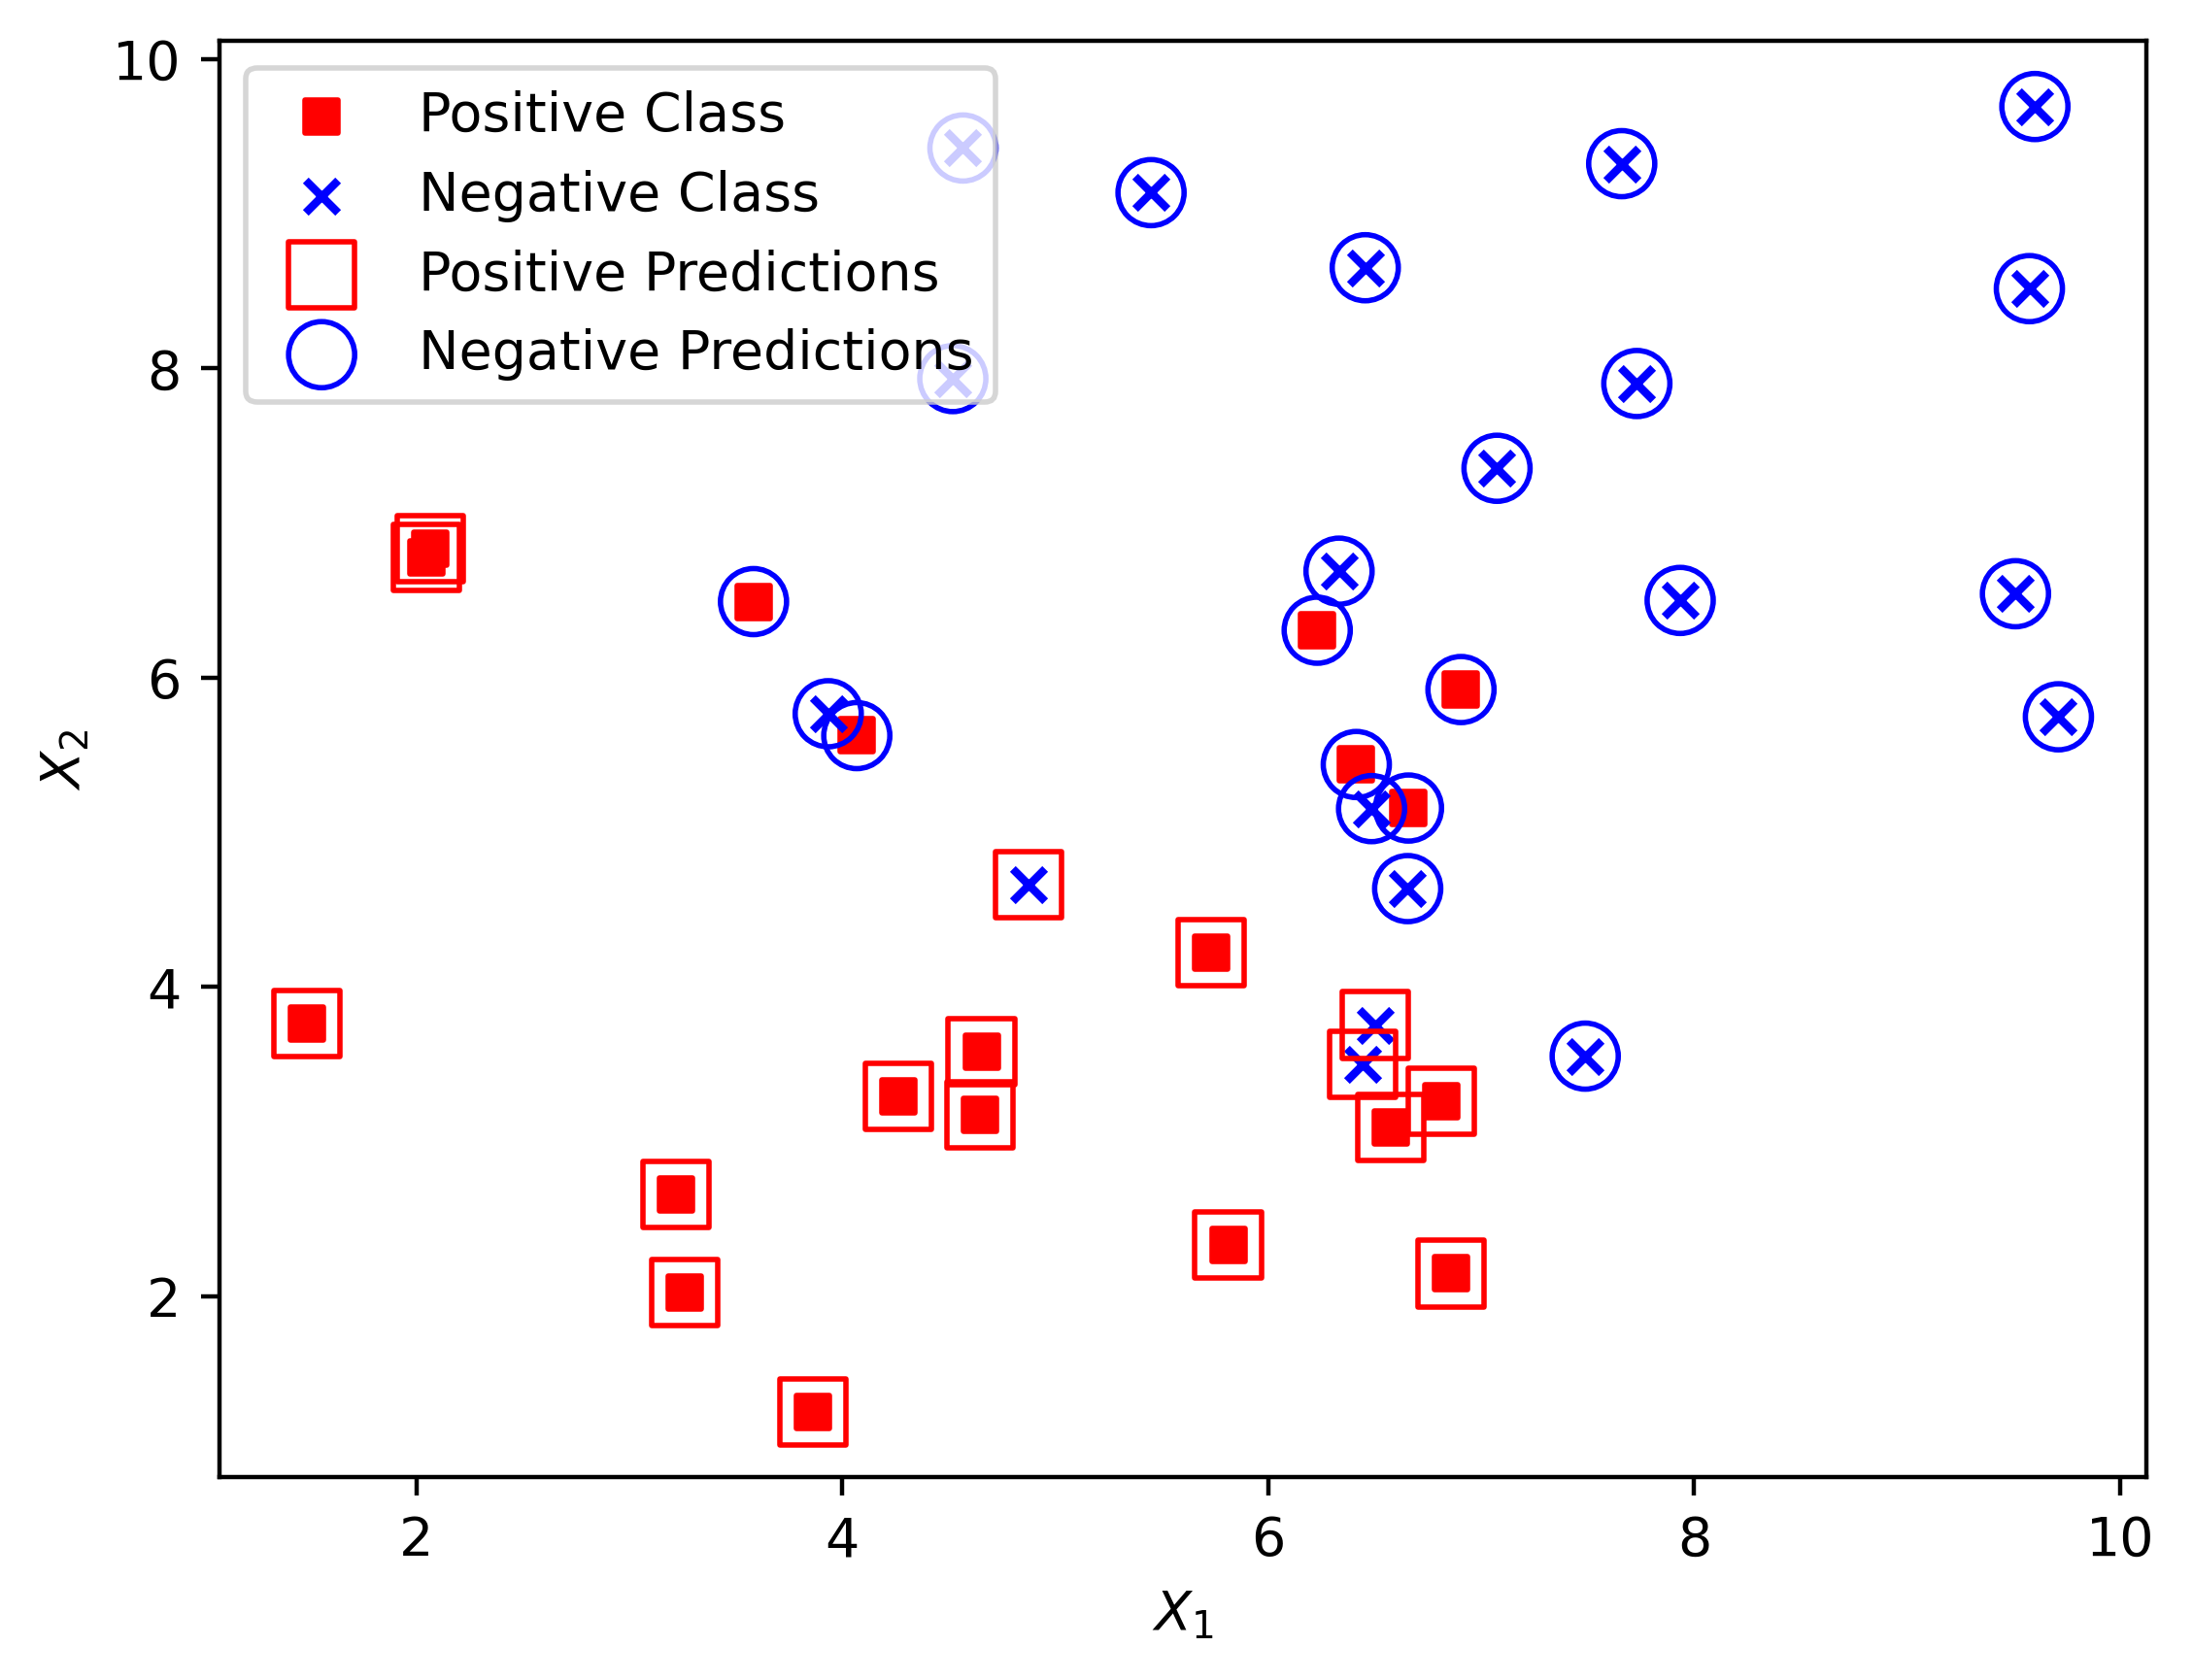

In [50]:
plt.scatter(X_1_pos, X_2_pos, color='red', marker='s')
plt.scatter(X_1_neg, X_2_neg, color='blue', marker='x')
plt.scatter(X[pos_indices,0], X[pos_indices,1],
            s=150, marker='s',
            edgecolors='red', facecolors='none')
plt.scatter(X[neg_indices,0], X[neg_indices,1],
            s=150, marker='o',
            edgecolors='blue', facecolors='none')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend(['Positive Class', 'Negative Class', 'Positive Predictions', 'Negative Predictions'])

The model seems struggle with the data that close to the decision boundary. But, it still unclear where the decision boundary is. We need to aquire it using inequality $X_2 \geq -(\theta_1 / \theta_2)X_1 - (\theta_0 / \theta_2)$.

In [51]:
# Get coefficient from the fitted model
theta_1 = logreg.coef_[0][0]
theta_2 = logreg.coef_[0][1]
print(theta_1, theta_2)

-0.16472042583006552 -0.2567518594997951


In [52]:
# Get the intercept
theta_0 = logreg.intercept_
print(theta_0)

[2.11271726]


Form those coefficient and intercept, we can obtain the linear decision boundary. The equation is $X_2 \geq -(\theta_1 / \theta_2)X_1 - (\theta_0 / \theta_2)$.

In [53]:
# Define decision boundary
X_1_decbound = np.array([0, 10])
X_2_decbound = -(theta_1/theta_2)*X_1_decbound - (theta_0/theta_2)

/tmp/ipython-input-384830326.py:5: UserWarning: You passed a edgecolor/edgecolors ('blue') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  neg_pred = plt.scatter(X[neg_indices,0], X[neg_indices,1], s=150, marker='x', edgecolor='blue', facecolors='none', label='Negative Prediction')


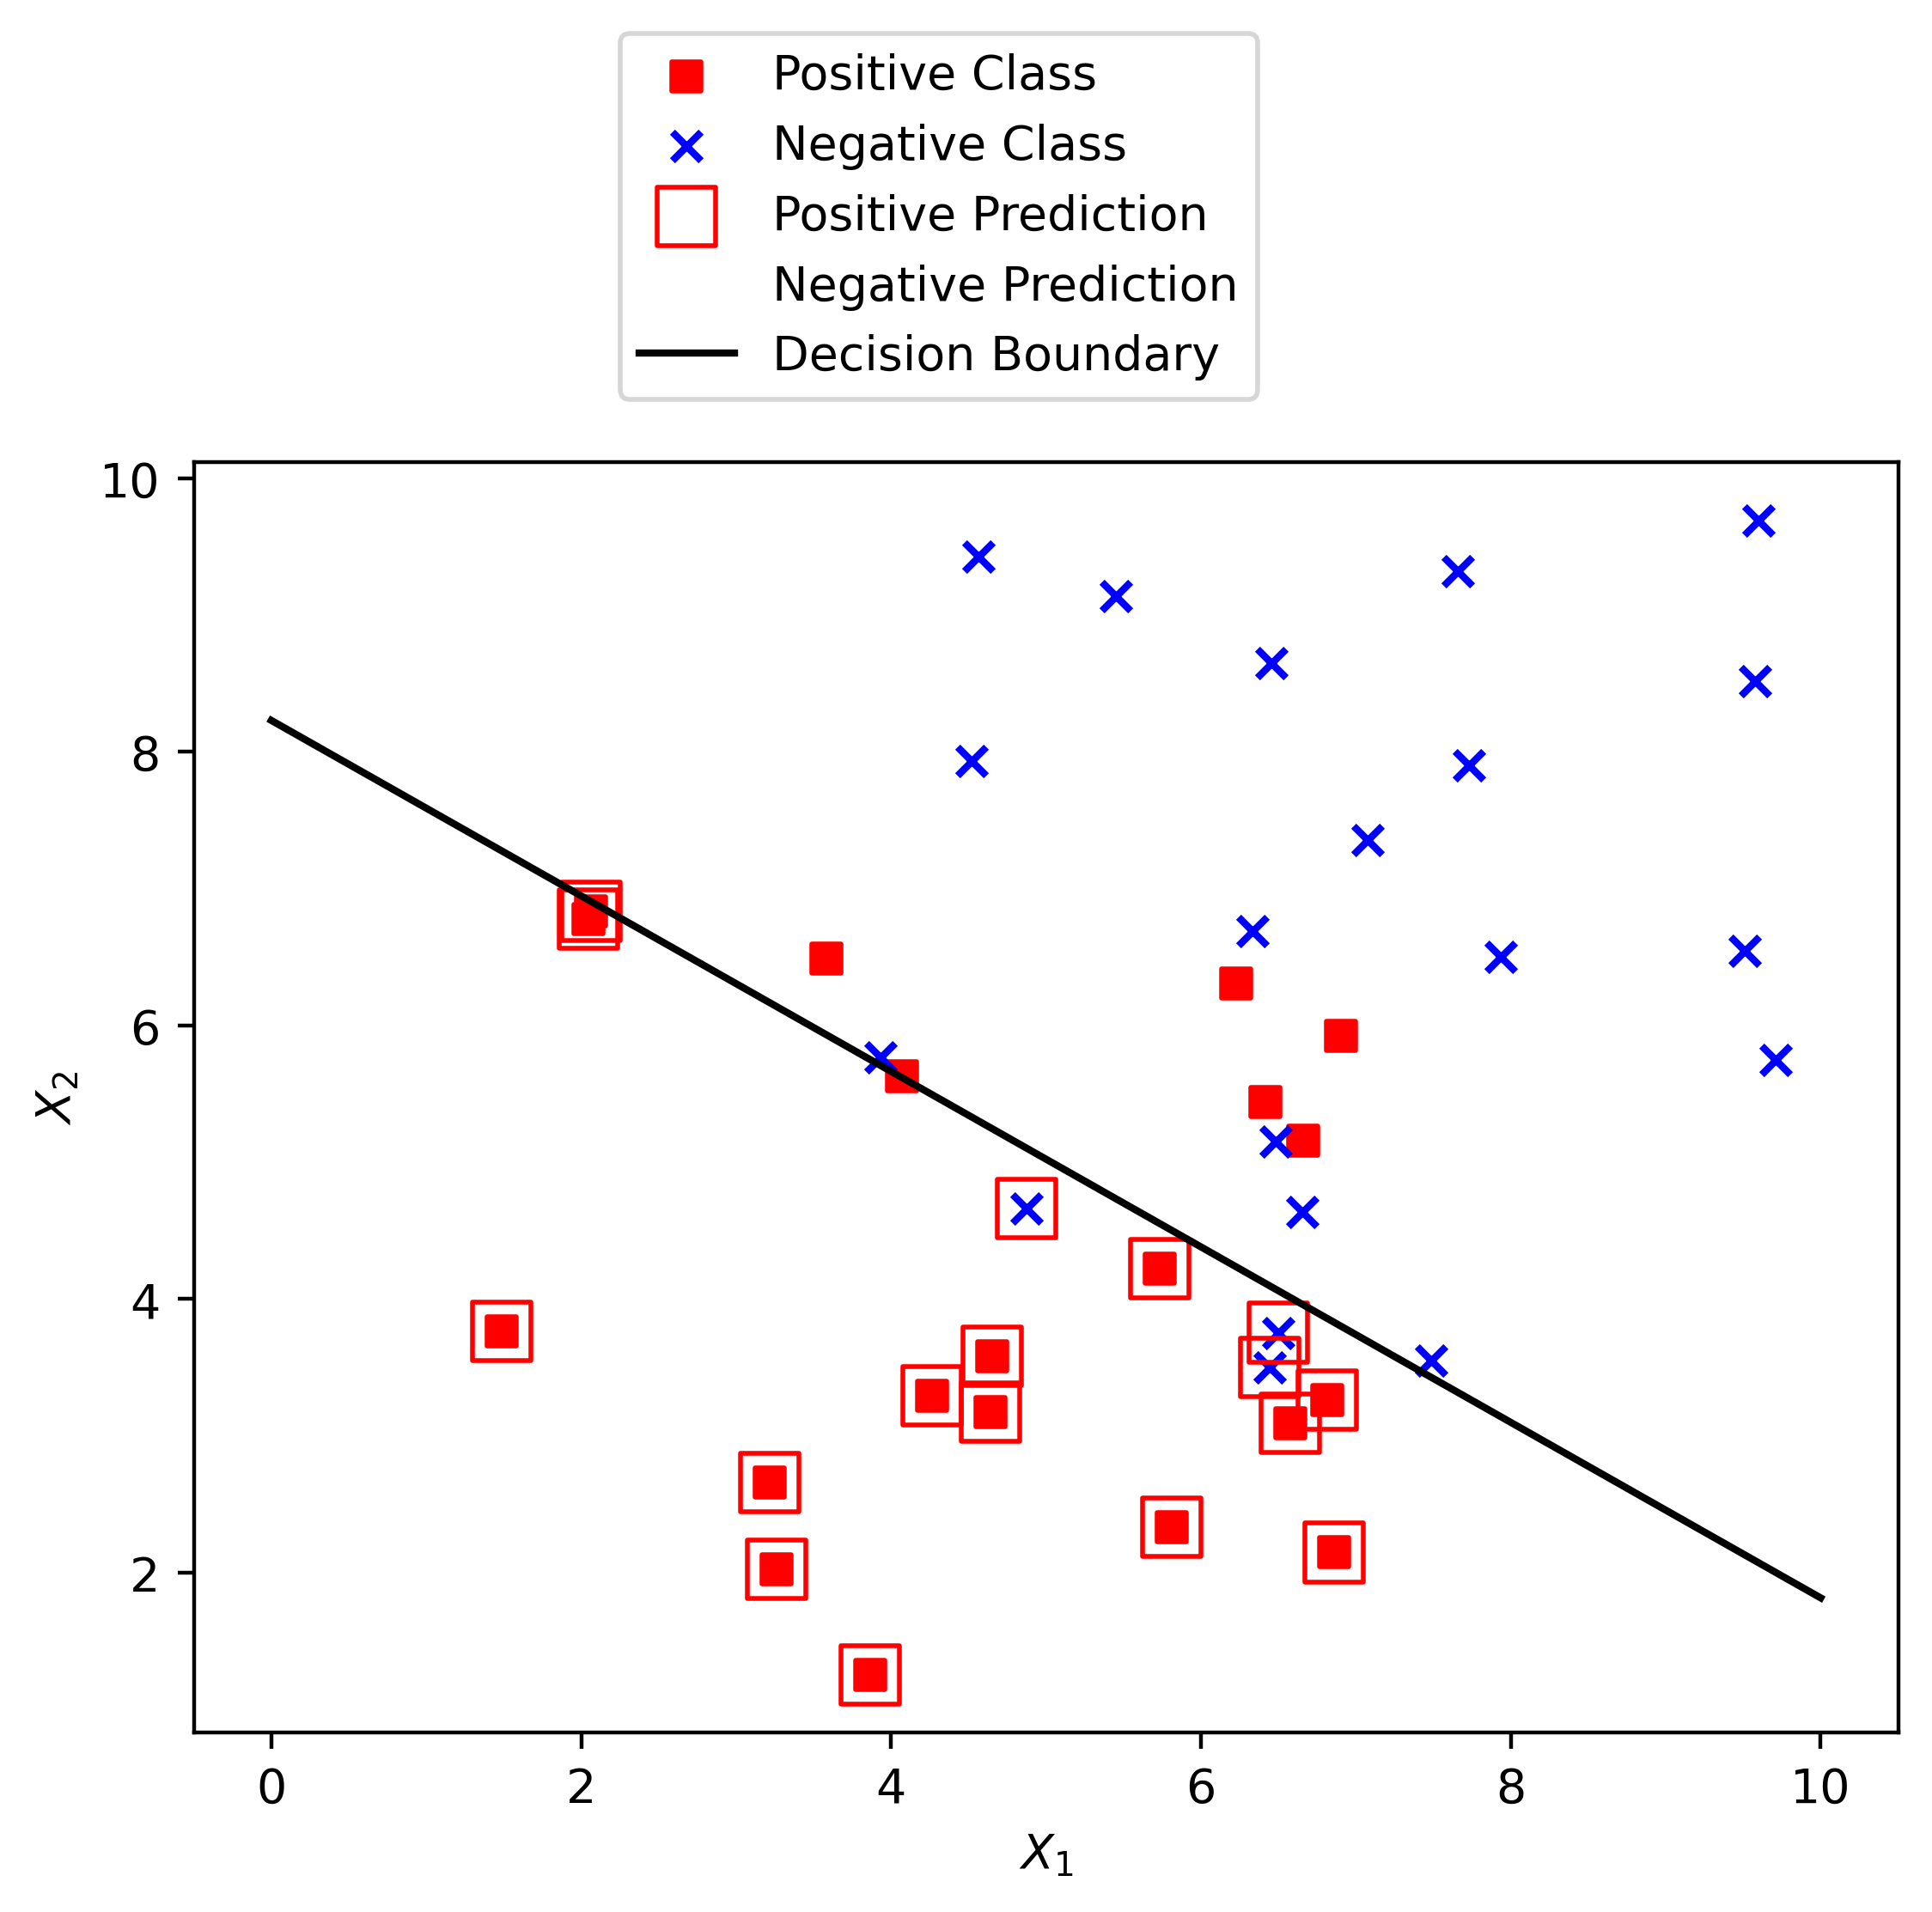

In [54]:
# Plotting decision boundary
pos_true = plt.scatter(X_1_pos, X_2_pos, color='red', marker='s', label='Positive Class')
neg_true = plt.scatter(X_1_neg, X_2_neg, color='blue', marker='x', label='Negative Class')
pos_pred = plt.scatter(X[pos_indices,0], X[pos_indices,1], s=150, marker='s', edgecolor='red', facecolors='none', label='Positive Prediction')
neg_pred = plt.scatter(X[neg_indices,0], X[neg_indices,1], s=150, marker='x', edgecolor='blue', facecolors='none', label='Negative Prediction')
dec = plt.plot(X_1_decbound, X_2_decbound, 'k-', label='Decision Boundary')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend(loc=[0.25, 1.05])

That makes more clear.

**Fit the Logistic Regression and Directly use Coefficient**

We will use PAY_1 and LIMIT_BAL

In [55]:
# Split the data 80/20
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df[['PAY_1', 'LIMIT_BAL']].values, df['default payment next month'].values,
    test_size=0.2, random_state=24
)

In [56]:
# Fit & pred the data
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)

In [57]:
# Calculate the coefficient and intercept
intercept_coef = np.concatenate([logreg.intercept_.reshape(1,1),
                                 logreg.coef_], axis=1)

In [59]:
# Creating array of features
one_and_features = np.hstack([np.ones((X_test.shape[0],1)), X_test])

In [60]:
X_lin_comb = np.dot(intercept_coef, np.transpose(one_and_features))

In [61]:
y_pred_proba_man = sigmoid(X_lin_comb)

In [62]:
y_pred_manual = y_pred_proba_man >= 0.5

In [63]:
np.array_equal(y_pred.reshape(1,-1), y_pred_manual)

True